In [1]:
import pandas as pd
import numpy as np
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_siap = pd.read_csv('data_siap.csv')
data_siap[data_siap['sentimen']=='o']

,username,text,sentimen
0,Ridwan83079388,*OPERASI YUSTISI UNTUK PENDISIPLINAN PEMUTUSA...,o
6,theiconomic,Pasar Digital (PaDi) UMKM Indonesia Virtual Ex...,o
10,deemaudra,"""Aku butuh jarak"" ternyata maksudnya positif c...",o
109,qylaanasa,Time covid ni paling sakit tak boleh ziarah,o
110,DharmaJaya68,"Hai Sobat DJ,\r\n\r\nUntuk menekan penyebaran ...",o
...,...,...,...
1140,kumparan,Simak 5 berita populer kumparan yang terjadi k...,o
1175,kumparan,"Menurut informasi yang dihimpun, vaksin AstraZ...",o
1179,kumparan,Benarkah tren baju off-shoulder saat musim vak...,o
1209,ChBdmn,@kompascom Jika sudah di vaksin covid19 apakah...,o


In [3]:
data_siap.shape

(1237, 3)

In [4]:
data_siap['sentimen'].value_counts()

p    825
o    287
n    125
Name: sentimen, dtype: int64

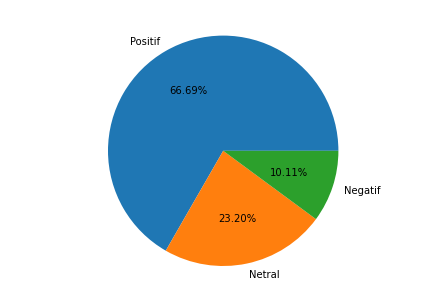

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sentimen = ['Positif', 'Netral', 'Negatif']
Nilai = data_siap['sentimen'].value_counts()
ax.pie(Nilai,labels=sentimen,autopct='%1.2f%%')
plt.show()

In [7]:
data_buang_netral = data_siap[(data_siap["sentimen"] == "p") | (data_siap["sentimen"] == "n")]
data_buang_netral.to_csv('data_total_latih.csv')

In [8]:
data_12000 = pd.read_csv('data_total_latih.csv')
data_12000

,Unnamed: 0,username,text,sentimen
0,1,Ridwan83079388,"*PENCEGAHAN, PENYEBARAAN VIRUS CORONA DI MAKO ...",p
1,2,Ridwan83079388,*OPERASI YUSTISI UNTUK PENDISIPLINAN PEMUTUSA...,p
2,3,Ridwan83079388,"*PENCEGAHAN, PENYEBARAAN VIRUS CORONA DI MAKO ...",p
3,4,irzanfajar_,@tsanymu covid kan takut sama presiden weh,n
4,5,theiconomic,Kolaborasi menjadi kunci penting untuk menyele...,p
...,...,...,...,...
945,1232,Beritasatu,Kemkes: Akses Pendaftaran Vaksin Lansia Sudah ...,p
946,1233,Beritasatu,Uganda Terima Paket Pertama Vaksin Covid-19 Co...,p
947,1234,Beritasatu,"Masyarakat Antusias Vaksin, Kota Bogor Kejar 8...",p
948,1235,Beritasatu,Hari Ini Vaksin Covid-19 Astrazeneca Tiba di I...,p


In [9]:
data_12000['sentimen'].value_counts()

p    825
n    125
Name: sentimen, dtype: int64

In [10]:
data_12000['text']=data_12000['text'].str.replace('(?:\@|https?\://)\S+', '')
data_12000['text']=data_12000['text'].str.replace('[^\w\s]',' ')
data_12000['text']=data_12000['text'].str.replace('#[^\s]+',' ')
#ilangin angka
data_12000['text']=data_12000['text'].str.replace('\d+',' ')
#ilangin enter
data_12000['text']=data_12000['text'].str.lower()
#ilangin spasi berlebih
data_12000['text'] = data_12000['text'].replace('\s+', ' ', regex=True)
#ilangin simbol
data_12000['text'] = data_12000['text'].replace('\n',' ',regex=True)

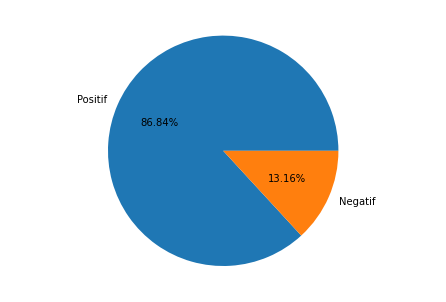

In [11]:
data_12000['sentimen'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sentimen = ['Positif', 'Negatif']
Nilai = data_12000['sentimen'].value_counts()
ax.pie(Nilai,labels=sentimen,autopct='%1.2f%%')
plt.show()

In [12]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ CLEANING ---------

def remove_karakter_aneh(text):
    return  re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", text)
data_12000['text'] = data_12000['text'].apply(remove_karakter_aneh)

def remove_username(text):
    return  re.sub('@[^\s]+', '', text)
data_12000['text'] = data_12000['text'].apply(remove_username)

def remove_tweet_special(text):
    # remove tab, new line
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data_12000['text'] = data_12000['text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

def remove_username(text):
    return  re.sub('@[^\s]+', '', text)

data_12000['text'] = data_12000['text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data_12000['text'] = data_12000['text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()



data_12000['text'] = data_12000['text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data_12000['text'] = data_12000['text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data_12000['text'] = data_12000['text'].apply(remove_singl_char)
data_12000['text'] = data_12000['text'].str.lower()
print('Cleaning Result : \n') 
print(data_12000)
print('\n\n')
data_12000.to_csv('data_hasil_cleansing.csv', index=False)


Cleaning Result : 

     Unnamed: 0        username  \
0             1  Ridwan83079388   
1             2  Ridwan83079388   
2             3  Ridwan83079388   
3             4     irzanfajar_   
4             5     theiconomic   
..          ...             ...   
945        1232      Beritasatu   
946        1233      Beritasatu   
947        1234      Beritasatu   
948        1235      Beritasatu   
949        1236      Beritasatu   

                                                  text sentimen  
0    pencegahan penyebaraan virus corona di mako po...        p  
1    operasi yustisi untuk pendisiplinan pemutusan ...        p  
2    pencegahan penyebaraan virus corona di mako po...        p  
3                    covid kan takut sama presiden weh        n  
4    kolaborasi menjadi kunci penting untuk menyele...        p  
..                                                 ...      ...  
945  kemkes akses pendaftaran vaksin lansia sudah d...        p  
946     uganda terima paket per

In [13]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
##nltk.download()
data_hasil_cleansing = pd.read_csv('data_hasil_cleansing.csv')
##data_hasil_cleansing

# ------ TOKENIZE ---------

# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_hasil_cleansing['text_token'] = data_hasil_cleansing['text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(data_hasil_cleansing['text_token'])
print('\n\n\n')
data_hasil_cleansing.to_csv('1_data_hasil_tokenizing.csv')

Tokenizing Result : 

0      [pencegahan, penyebaraan, virus, corona, di, m...
1      [operasi, yustisi, untuk, pendisiplinan, pemut...
2      [pencegahan, penyebaraan, virus, corona, di, m...
3               [covid, kan, takut, sama, presiden, weh]
4      [kolaborasi, menjadi, kunci, penting, untuk, m...
                             ...                        
945    [kemkes, akses, pendaftaran, vaksin, lansia, s...
946    [uganda, terima, paket, pertama, vaksin, covid...
947    [masyarakat, antusias, vaksin, kota, bogor, ke...
948    [hari, ini, vaksin, covid, astrazeneca, tiba, ...
949    [presiden, venezuela, menerima, suntikan, vaks...
Name: text_token, Length: 950, dtype: object






In [14]:
from nltk.probability import FreqDist
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

data_hasil_cleansing['text_token_fdist'] = data_hasil_cleansing['text_token'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(data_hasil_cleansing['text_token_fdist'].apply(lambda x : x.most_common()))
print('\n\n')
data_hasil_cleansing.to_csv('2_data_hasil_term_frequency.csv')
# data_hasil_cleansing['text_token'].to_csv('token_kata.csv')
data_hasil_cleansing['text_token_fdist'].apply(lambda x : x.most_common()).to_csv('token_kata2.csv')

Frequency Tokens : 

0      [(di, 3), (polsek, 3), (tiga, 3), (juhar, 3), ...
1      [(penyebaran, 2), (dan, 2), (polsek, 2), (tiga...
2      [(di, 3), (polsek, 3), (tiga, 3), (juhar, 3), ...
3      [(covid, 1), (kan, 1), (takut, 1), (sama, 1), ...
4      [(pandemic, 2), (covid, 2), (kolaborasi, 1), (...
                             ...                        
945    [(kemkes, 1), (akses, 1), (pendaftaran, 1), (v...
946    [(uganda, 1), (terima, 1), (paket, 1), (pertam...
947    [(masyarakat, 1), (antusias, 1), (vaksin, 1), ...
948    [(hari, 1), (ini, 1), (vaksin, 1), (covid, 1),...
949    [(presiden, 1), (venezuela, 1), (menerima, 1),...
Name: text_token_fdist, Length: 950, dtype: object





In [16]:
from nltk.corpus import stopwords
import string 
import re #regex library

# ----------------------- STOPWORD -------------------------------
# stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', "yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua',
                       'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena',
                       'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar',
                       'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah',
                       'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga',
                       'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda',
                       'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka',
                       'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya',
                       'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah',
                       'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh',
                       'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin',
                       'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya',
                       'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong',
                       'tentu', 'amat', 'apalagi', 'bagaimanapun', 'min',  'tp', 'btw', 'kak', 'in', 'ni', 'ry', 'dv', 'kak', 'bg', 'dv', 'jeh', 'ir', 'coz', 'wlo', 'ir', 'ru', 'wih','in', 'khairilanwar', 'arif',
                       'dah', 'ku', 'aj', 'we', 'pa', 'da', 'dn', 'ad', 'qu', 'cm', 'aaaa', 'dk', 'ka', 'el', 'yak', 'wkwk', 'wkwkwk', 'wkwkwkwk', 'aww', 'dk', 
                       'jajo', 'jm', 'argh', 'dah', 'dv', 'agsbwysvajsusbsny', 'uhhh', 'th', 'euy', 'woy', 'irwanda', 'nurdansyah', 'ah', 'rb', 'an', 'hf', 'hahaha', 
                       'fa', 'eng', 'cjr', 'kk', 'sayid', 'aliazhar', 'dinahar', 'harisistyakara', 'remy', 'bdrsydd', 'tomy', 'arfianto', 'syaepudin', 'ilman', 'gan', 
                       'amoy', 'asepirawan', 'uciha',
                       'dg', 'ku', 'loh','itu', 'deh','yg','ini', 'ya', 'guys','dg','dr','si', 'yok', 'nya', 'kumparannews', 
'kumparansport','kumparannews', 'jagajarak', 'kumparantech','kumparanvideo', 'satgascovid',
'kumparanhits','topnews','kumparannews','kumparannews','publisherstory', 'kumparannews',
 'databoks','sjy','gtu', 'dong','vaksinasimelawanpandemi','wkwkwkwkwk', 'ahahahaha','udah',
'kumparansains', 'satgascovid', 'ingatpesanibu', 'pakaimasker', 'jagajarak', 'jagajarakhindarikerumunan',
 'cucitangan', 'cucitanganpakaisabun', 'rakyatmerdeka','fc', 'rmcoid', 'vaksincorona','viruscorona',
 'via','vaksincorona','muhyiddinyassin', 'muhyiddinout', 'rajaabddullah', 'malaysian', 'heilongjiang',
'aliffalli','peterandre','cnnindonesia', 'detiknetwork', 'grimes','coronaupdate', 'jokowidivaksin',
'newnormal', 'viruscorona', 'sandiagauno', 'vaksinlolosujiklinis','cnnindonesia', 'funfotofootball',
 'cb','vaksinasidimulai','lt','sayasiapdivaksin', 'vaksinasimelawanpandemi','hhh',
'bongkarsumberdanafpiteroris', 'tumko', 'jyada', 'ho', 'rha', 'jra', 'unke', 'bare', 'me', 'socho', 
'jo', 'itne', 'garib', 'ki', 'unke', 'pass', 'phone', 'ni', 'online', 'class', 'liye', 'see',
 'student', 'khatra', 'ni', 'ydi', 'hota', 'to', 'ab', 'tk', 'kitne', 'student', 'die', 'ho', 
'jate', 'lekin', 'abhi', 'tk', 'ek', 'bhi', 'ni', 'disiplinprokes','heii', 'kasuscorona', 
'pasiencorona', 'varianbaruviruscorona', 'kasusvarianbaruviruscorona', 'pi', 'fe','tempometro',
'temponasional','tempodunia', 'pehle', 'toh', 'humari', 'minister', 'mla', 'mp', 'lagaiye', 'jo', 
'lacs', 'gathering', 'me', 'distribution', 'spreading', 'abhi', 'gaye', 'nehi', 'bolki', 'speeding', 
'badha', 'breaking', 'news', 'vaksinlolosujiklinis', 'bangunkembaliperadabanislam', 'covidsafebumn', 
'bumnuntukindonesia', 'physicaldistancing', 'beritasonora', 'religione', 'tvone','akipagitvone', 
'dirumahnontontvone', 'cariberitaditvone','asmara', 'inaf','amp', 'afsel','alert', 'warning','itr',
 'indonesiatanparasis', 'jalinpersatuan', 'prmn', 'pikiranrakyatmedianetwork', 'potensilokalgonasional',
 'kolaborasimediapreneurnusantara', 'pikiranrakyat','lawancorona', 'lawancovid', 'animasi', 'tips', 
'satgascovid', 'ingatpesanibu', 'pakaimasker', 'jagajarak', 'update', 'updatecorona', 'updatecovid', 
'updatecoronaindo', 'updatecovidindo', 'coronaindonesia', 'covidindonesia', 'ingatpesanibu', 'pakaimasker',
'aa','vivacoid', 'ridwankamil', 'zonamerah', 'vlix', 'lifestyleone','ingatpesanibu','selengkapnya', 
'klik', 'link', 'lifestyleone', 'faktamitoslifestyleone', 'akimalamtvone', 'dirumahnontontvone', 
'cariberitaditvone', 'sholawatnabi', 'nabimuhammadsaw', 'keutamaansholawat','divhumaspolri', 
'humaspmj', 'humaspolrestrobekasi', 'humaspolsekcikarangtimur', 'polsektoba', 'polressanggau', 
'poldakalbar','hallo', 'guys', 'yuk', 'bergabung', 'dengan', 'nusantarapoker', 'permainan', 
'judi', 'online', 'yang', 'sangat', 'seru', 'bisa', 'searching', 'di', 'google', 'cari',
 'nusantarapoker', 'nusantarapoker', 'judionline', 'poker', 'domino', 'pkvgames',
 'tiktok', 'covid', 'judi', 'pkv','hallo', 'guys', 'yuk', 'bergabung', 'dengan',
 'pokermas', 'permainan', 'judi', 'online', 'yang', 'sangat', 'seru', 'bisa', 'searching',
 'di', 'google', 'cari', 'pokermas', 'pokermas', 'judionline', 'poker', 'domino', 'pkvgames', 
'tiktok', 'covid', 'judi', 'pkv','ksc', 'mnctvnews', 'lintasinewspagi','ppkmpatuhiprokes', 
'mbersamatnipolri','wkwkwkwkwk', 'presidenindonesia', 'tribunkaltim', 'habibrizieq', 'habibrizieqshihab',
 'habibrizieqpositifcorona', 'positifcorona', 'tersangkakasushoaks', 'menantuhrs', 'rsummi',
 'fpi', 'frontpembelaislam', 'tribunkaltim', 'vaksinsinovac', 'mellygoeslawvsdrtirta', 
'coronadanlockdown', 'humascibarusah', 'beritaterkini', 'nowornever', 'bravotnipolrirakyat',
'vaksinyginginhidupaja', 'vaksinyginginhidupaja', 'vaksinhalal', 'sinovachalal', 'ee', 'neenga', 
'konjam', 'pathatta', 'padama', 'irunga', 'porumaiya', 'ticket', 'ah', 'vangi', 'pakattum', 'summa',
 'oothi', 'oothi', 'fans', 'emotions', 'kooda', 'vilaiyadatha', 'nanba', 'intha', 'festival', 
'entha', 'problemum', 'ilama', 'oduna', 'than', 'cinemake', 'nalathu', 'un', 'asaiku', 'ilatha', 
'ticketku', 'fans', 'ah', 'theruvuku', 'izhukathinga', 'pavam', 'avanga', 'wkwk','ithelam', 
'enga', 'poi', 'mudiya', 'pogutho', 'nenachu', 'oru', 'thanuku', 'kuda', 'payam', 'ilaye','jb', 
'tk', 'ha', 'tb', 'tk', 'ha', 'me', 'job', 'uske', 'bad', 'khatm', 'ho', 'jayega', 'job', 'bhi', 
'khatm', 'ho', 'jayega', 'me', 'job', 'krne', 'wale', 'bachho', 'job', 'vnchhit', 'na', 'kre',
 'mbersamatnipolri','wkwkwk','lah', 'ini', 'br', 'thn', 'nie','xixixixixiiiiii', 'tadpolegiveaway',
'jawabannya', 'adalah', 'puzzle', 'holisticareesterc', 'wish', 'me', 'luck','done', 'wish', 'me', 
'luck', 'follow', 'ojol', 'pangeran', 'asli', 'yg', 'ada', 'badaknya', 'gak', 'kerja', 'karena', 
'lumayan', 'buat', 'keperluan', 'rumah','done', 'mau', 'ovo', 'wish', 'me', 'luck','spm',
'indonesiasiapdivaksin', 'vaksinuntuknegeri', 'vaksinuntukkita', 'dukungvaksin', 'vaksinamanbikinnyaman', 
'makindisiplinyakinvakin', 'makindisiplin', 'yakinvaksin','duh', 'app', 'tuh', 'yak','fe','ekonomimakro',
 'dukunglangkahpemulihan','polrisahabatmasyarakat', 'polriagenperubahan', 'binjaikotaku', 
'kapolresbinjai', 'polsekbinjai','patahhatimaliki','realvcs','amanahhrsfokuskm','indonesiatanparasis', 
'kamibersamajkt','boikotsyariahmandiri','realaccount','vcstrusted', 'videonya', 'aja', 'woiii','wkwk',
'hle', 'rukjo', 'bugge', 'krke', 'flights', 'bnd', 'aa', 'main', 'odhero', 'aya', 'hoya', 'chlange',
 'jrur','akasjaksksj','hahahah', 'dukunglangkahpemulihan','masterfilm', 'vandhalum', 'pakalam', 'apdi',
 'oru', 'padam', 'sema', 'worthu', 'master', 'fokuspulihkannegeri', 'ksnhg', 'bangunkembaliperadabanislam',
 'syariahislamjadipedoman', 'khilafahislamiahsistemnya', 'follow', 'patuhiprotokolkesehatan','daba', 'ya', 
'khti', 'makhlatnach', 'njiw', 'nkhtbo','babe', 'news','detikhealth', 'bolacom', 'bbc', 'news', 
'vaksinuntukkita', 'vaksinuntuknegeri', 'vaksinasimelawanpandemi', 'indonesiahebat', 'iyeaaa', 'du', 
'hastat', 'es', 'ches', 'jogum', 'vor', 'hamova', 'yaggi', 'inghayenagh', 'zeh', 'inshallah', 
'nevdhu', 'aggi', 'adhili', 'iruh', 'anaghdju', 'kan', 'lukan', 'ulach', 'anruh', 'haraga',
'dukunglangkahpemulihan', 'vaksinlolosujiklinis', 'kendricklamar', 'aniesgubernurgagal','fisheries',
 'supply', 'chain', 'solution', 'hasillaut', 'coldchain', 'supplychain', 'coldstorage', 'fulfillment',
'dpm', 'wkwk','reposted', 'from', 'polsekjetisjogja','polresjogja', 'polsekjetisjogja', 'bersamalawancovid',
'check', 'out', 'my', 'latest', 'article','hahaha','hahah', 'nur', 'sho','vaksinamanefektifhalal', 
'covidvaccine','real', 'fortes', 'fortuna', 'adiuvat' , 'sekolahpramugari','energizingyou', 'klik', 'mdknews',
 'news', 'merdekadotcom', 'covid', 'pakaimasker', 'amandirumah', 'mdkbl', 'pakaimasker', 'amandirumah',
 'mdkbl','humaspolrescilegon', 'rtmcpoldabanten', 'humaspoldabanten', 'pakaimaskeruntuksemua', 
'prokesuntukkitasemua', 'vaksinkitadatanglagi', 'gsfz','ksihyf', 'press', 'release', 'media', 'center',
'palangka', 'raya', 'kunjungi', 'situs', 'resmi', 'infocovid', 'pky', 'infocovid', 'plk','tolakdivaksinsinovac', 
'pijatrefleksi','pokermas', 'hallo', 'guys', 'yuk', 'bergabung', 'dengan', 'pokermas', 'permainan', 'judi', 
'online', 'yang', 'seru', 'bisa', 'searching', 'di', 'google', 'cari', 'pokermas', 'pokermas',
 'transportasiamanproduktif', 'adaptasikebiasaanbaru', 'djplkemenhub', 'djplkerjadenganhati', 
'penghubungindonesia', 'smrthublapastinya','gujrat', 'walo', 'patang', 'dori', 'kharid', 'liye', 'ya', 'is',
 'bar','ki', 'wjaah', 'nahi', 'mna', 'rhe','aaaaaaaaaaaaa','hahaha','coronabisadisembuhkan', 'coronabisadicegah', 
'yoonjaehyuk', 'thefirststep', 'treasureeffect','polrestajogjakartabermasker', 'kesehatanpulihekonomibangkit',
'beritajogja', 'jogjaistimewa','baca', 'selengkapnya','zamanotoriter','update','alaaaahlah', 'wkwkkwkw', 
'wkwkwwkk', 'wkwkwkwk','wkwkwkw', 'acehkini','monkey', 'bussiness','heuheuheuheuheuheu', 'cosmicjokes',
 'jawatimurbangkit','perangkatdesa','vaksincoronasinovac','gjd','wai', 'shin', 'tunda', 'dai', 'ba', 'fg',
 'biya', 'muna', 'kudin', 'makarnta', 'ba', 'mie', 'ruwansu', 'damu', 'ne', 'fg', 'nd', 'na', 'scam','pepbts', 
'umelusi', 'oneminyaka', 'emihlanu', 'usekulungele', 'ukuyoqala', 'ibanga', 'akeve', 'ejabulile', 'ebona', 
'izimfanele', 'zakhe', 'zesikole', 'kanti', 'futhi', 'usenalo', 'ulwazi', 'lokuzivikela', 'kwi', 'da','ki',
 'waba', 'apki', 'ada', 'dono', 'hi', 'jan', 'lewa', 'hain','bawa', 'ji', 'sialkot', 'baat', 'ab', 'bh', 
'apki', 'khidmat', 'mey', 'hazir', 'fe','couplegoals', 'fyp', 'sukahatikaulah', 'patahhatimaliki',
 'gengpagimgt','zonarequestmalam', 'mgtradio','follow', 'tysm', 'aaaaaaa','aktual', 'newsupdate',
 'beritaviral', 'usd', 'dolar','europe', 'hehe','saksikan', 'live', 'streaming', 'tvone','ny',
 'waila', 'rehny', 'ki', 'adat', 'dal', 'di', 'ha', 'bhai','high', 'court', 'khud', 'online', 
'kaam','dilva', 'vaah', 'fe', 'ye', 'sab', 'anpadh', 'ministers', 'ki', 'vajah', 'sab', 'ki', 
'mili', 'bhagat', 'lagti', 'is', 'sem', 'me', 'education', 'me', 'sirf', 'sirf', 'ppt', 'youtube',
 'dekha', 'technical', 'naam', 'pr', 'tolakdivaksinsinovac', 'tolakdivaksinsinovac','zaidi', 'ya', 
'shule', 'kutoka', 'eneo', 'bunge', 'la', 'vihiga', 'hii', 'leo', 'zimeweza', 'kunufaika', 'kutokana',
 'na', 'mpango', 'wa', 'ugavi', 'wa', 'vifaa', 'vya', 'kuzuia', 'kuenea', 'kwa', 'virusi', 'vya', 'mpango',
 'huu', 'ni', 'kwa', 'hisani', 'ya', 'hifadhi', 'ya', 'ustawi', 'wa', 'eneo', 'bunge', 'hilo', 
'ukiongozwa', 'na', 'mbunge', 'wa', 'sehemu', 'hiyo','intha', 'health', 'condition', 'la','va', 
'vida', 'adhu', 'romba', 'danger', 'so', 'adha', 'pannirukka', 'maataar','wkwk', 'ayse', 'sab', 
'fail', 'ho', 'jayen', 'gaye', 'agar', 'ap', 'ma', 'college', 'khol', 'rahay', 'hain', 'tu', 'iska', 
'tu', 'karen', 'kucu', 'online', 'kren', 'sendups', 'ya', 'phir', 'late', 'karen','ba', 'shhour', 'mn', 
'isabti', 'hallaa', 'la', 'eref', 'baba', 'eno', 'ken', 'ma','marekani', 'sokwe', 'wakutwa', 'na', 
'sokwe', 'wawili', 'katika', 'bustani', 'ya', 'wanyama', 'ya', 'san', 'diego', 'nchini', 'marekani',
 'wamekutwa', 'na', 'virusi', 'vya', 'chanzo', 'cha', 'maambukizi', 'kwa', 'sokwe', 'hao', 'bado', 
'kinachunguzwa', 'kubaini', 'iwapo', 'virusi', 'hivyo', 'vilisambaa', 'baina', 'ya', 'wanyama', 'au', 
'kutoka', 'kwa', 'binadamu', 'gt', 'cao', 'lepa', 'si', 'add', 'mi', 'block', 'sam','andu', 'nimakwa', 
'kumana', 'na', 'uwau', 'wa', 'nthini', 'wa', 'ilungu', 'ya', 'masaa', 'mavitu', 'vala', 'utalo', 'wa', 
'ala', 'makwite', 'wavika', 'kuma', 'yila', 'uwau', 'usu', 'walikile', 'vaa', 'kenya','bol', 'to', 'ese',
 'rha', 'jese', 'ye', 'aeronautical', 'engineer', 'ho', 'khudka', 'iit', 'cm', 'me', 'modiji', 'bheek',
 'maang', 'rha', 'tha', 'help', 'ki', 'wese', 'mohalla', 'clinic', 'khul', 'gye', 'ki', 'abhi', 'bhi', 'lock', 
'down', 'me', 'band', 'india', 'ki', 'population', 'to', 'pata', 'hogi', 'department', 'unko', 'to', 'ye',
 'bhi', 'pata', 'hoga', 'ki', 'tax', 'professionals', 'kitne', 'cases', 'bhi', 'pata', 'honge', 'india', 'me',
 'how', 'can', 'tax', 'department', 'copare', 'oranges', 'with', 'apple', 'mean', 'koi', 'youtuber', 'analysis',
 'karwa', 'rahe', 'ho', 'kya', 'koi', 'logic', 'is', 'baat', 'ki', 'jyada', 'to', 'log', 'berojgari', 'mar',
 'rhe', 'jeng', 'af', 'fe', 'divisihumaspolri', 'poldasumut', 'multimedia', 
'ayokitapatuhiprotokolkesehatanagarterhindardaricovid', 'promoter', 'promoterpol','kati', 'ya', 'maambukizi', 
'hayo', 'mapya', 'ni', 'wakenya', 'huku', 'wakiwa', 'raia', 'wa', 'kigeni', 'ongeausikike','wagonjwa', 
'wamelazwa', 'hospitalini', 'humu', 'nchini', 'huku', 'wakiwa', 'wamejitenga', 'nyumbani', 'ongeausikike', 
'vaksinkitadatanglagi','hhhh','hasal', 'feeha', 'nas', 'matet', 'haraye', 'bas', 'khaleeny', 'afarfeshko', 
'arafko', 'ala', 'jimmy', 'shaf', 'pappy', 'mommy', 'nazla', 'dubai', 'teshoofo', 'heya', 'kaman', 'elhamdolella',
 'wel', 'shokr', 'lellah','aaaaaa','mubarak', 'ho', 'peda', 'hua','jack', 'tis', 'rules','scissor', 'sharp', 
'garerw', 'kamm', 'katnw', 'napaye', 'paxi','lagxa', 'duri', 'banauna', 'parenw', 'di', 'sanga','regular', 'pn', 
'online', 'cha', 'zhla', 'phija','ata', 'pn', 'sampla', 'nhi', 'ahe', 'amhi', 'ex', 'denr', 'tr', 'khi', 'safty', 
'rahnr', 'ka', 'amla', 'zhla', 'tr', 'tyacha', 'jhimadri', 'clg', 'wala', 'ghenr', 'ka','vaccine', 'utni', 'hi', 
'bharosaymand', 'jitna', 'feku','hey', 'un', 'velaya', 'paru', 'unga', 'vara', 'pothu', 'lusu', 'un', 'velaya',
 'mattum', 'paru', 'okk','vaanga', 'spreading', 'hero', 'modiji', 'congratulations', 'india', 'our', 'scientists',
 'have', 'successfully', 'developed', 'vaccine', 'chapri', 'aashiq', 'modiji', 'ek', 'vaccine', 'bnawa', 'dijiye', 
'jisase', 'is', 'dil', 'ka', 'dard', 'khatam', 'ho', 'jaye', 'aur', 'mai', 'usko', 'bhul', 'jau', 'modiji','ti',
 'sir', 'agar','katam', 'nhi', 'hua', 'to', 'nios', 'bacho', 'ku', 'bhulaya', 'jara', 'kyu', 'paper', 'kra', 'jara', 
'agar', 'is', 'class', 'me', 'kisi', 'bache', 'ki', 'tabet', 'karabh', 'hoti', 'to', 'iske', 'jimedaar', 'sirf', 
'ap', 'hoge', 'meri', 'apse', 'request', 'plz', 'bacho', 'prmote', 'kr', 'do', 'ap', 'sbko', 'bachna', 'liye', 
'ho', 'nuskhan', 'liye', 'nhi', 'plz', 'prmote','minipo', 'zangu', 'madaba', 'uku', 'sijui', 'habar', 'ya','ka', 
'kahar', 'chal', 'rha', 'pta', 'ya', 'nhi', 'aapko','ni', 'tanzania', 'pekee', 'ambako', 'raia', 'wake', 'wanalipia', 
'upimaji', 'wa', 'dola', 'sawa', 'na', 'wageni', 'wa', 'mataifa', 'mengi', 'unalipa', 'zinaingia', 'moja', 'kwa', 
'moja', 'tra', 'uwe', 'mgonjwa', 'mahututi', 'uwe', 'maskini', 'uwe', 'tajiri', 'baba', 'wa', 'taifa', 'alikusanya', 
'kodi', 'lakini', 'alikusanya', 'kwa', 'staha', 'na', 'nidhamu', 'siyo', 'kihunihuni','pamoja', 'na', 'kwamba', 
'mungu', 'ametusaidia', 'kupunguza', 'nchini', 'lakini', 'hatupaswi', 'kutoa', 'hotuba', 'za', 'kudhihaki', 'dhidi', 
'ya', 'mataifa', 'mengine', 'tuendelee', 'kuwa', 'mwanga', 'na', 'matumaini', 'kwa', 'wengine', 'huku', 'tukizidi', 
'kuombeana','tunawacheka', 'wazungu', 'na', 'ikijiona', 'sisi', 'tuko', 'salama', 'na','lakini', 'tunalialia', 'na',
 'sekta', 'ya', 'utalii', 'kushuka', 'mashamba', 'ya', 'maua', 'wafanyakazi', 'wamepunguzwa', 'nikafikiri', 'labda', 
'tutatoa', 'ahueni', 'kwa', 'wanaopoteza', 'kazi', 'na', 'sisi', 'wenyewe', 'kwenda', 'kutalii', 'nyenyekeeni', 'chini',
 'ya', 'mkono', 'wa', 'enzi', 'wa', 'mungu','uae', 'la', 'nee', 'paatha', 'angathaan', 'irukkom', 'thaan', 'neraya',
 'theatres', 'ticket', 'apdiye', 'iruku', 'payathula', 'pakistan', 'main', 'cases', 'kam', 'honay', 'ki', 'aik', 
'waja', 'swab', 'testing', 'ha', 'jis', 'jahilana', 'tarekay', 'say', 'ye', 'log', 'sample', 'lete', 'ha', 'naak',
 'galay', 'andar', 'he', 'wafaat', 'pa', 'jata', 'ho', 'ga', 'coronavirus','curhatantukangsound', 'unismakecewa',
'see', 'what','has', 'done', 'dexter', 'lab', 'bandh', 'thela', 'laga', 'raha', 'ab','turudishuleninatumaini', 
'serikali', 'imesisitiza', 'wanafunzi', 'wasomee', 'hata', 'chini', 'ya', 'miti', 'ili', 'kuweka', 'umbali', 'wa', 
'mita', 'moja', 'unusu', 'kutoka', 'kwa', 'mwengine', 'kuzuia', 'kusambaa', 'kwa', 'je', 'sisi', 'kama', 'tunaweza', 
'tukasaidia', 'kwa', 'njia', 'gani', 'sema', 'nasi', 'sasa','kutokana', 'na', 'baadhi', 'ya', 'shule', 'nchini', 
'kutokuwa', 'na', 'madawati', 'ya', 'kutosha', 'ili', 'kuzingatia', 'umbali', 'wakti', 'huu', 'wa', 'je', 'kama', 
'jamii', 'tunazoishi', 'karibu', 'shule', 'tunafaa', 'kusaidiaje', 'shule', 'wakati', 'huu', 'mgumu', 
'turudishulenatumaini', 'cometwendeshule', 'komeshakoronaokoamaisha','jogjaelinglanwaspada', 'jogjabisa','inga', 
'illaka', 'prblm', 'illa','yenada', 'mutta', 'thanama', 'pesitu', 'iruka', 'us', 'la', 'iruka', 'indians', 'dhan',
 'padam', 'papanga', 'positive', 'aagura', 'yellame', 'indians', 'ah','hehehe','fe', 'selengkapnya', 'dapat', 'di',
 'akses', 'melaui', 'jogjaelinglanwaspada', 'bersamalawanviruscorona', 'jogjabisa', 'covid', 'lawancovid',
 'kominfodiy','ye', 'evm', 'chor', 'sarkar', 'dess', 'pe', 'gst', 'me', 'tax', 'name', 'luta', 'he', 'abto', 
'name', 'lutt', 'chalu', 'hey', 'ya', 'vyapam', 'pe', 'ya', 'sugikal', 'strik', 'pe', 'ya', 'mashk', 'pe', 'ya',
 'hellmat', 'pe', 'aeisey', 'hi', 'lutt', 'chalaye', 'hey', 'kanun', 'mey', 'koy', 'inpe', 'action', 'lene', 
'vala', 'kanun', 'nahiy', 'hey', 'kya', 'yehi', 'hota', 'rahega', 'barbad', 'hi', 'karengey', 'mzee', 'baba',
 'alisema','tutaishi', 'nayo', 'kama', 'kaswende', 'ukimwi', 'surua', 'gono', 'homa', 'ya', 'ini', 'nazani', 
'alieleweka', 'vizuri', 'sana', 'kipi', 'ambacho', 'hamkijua', 'baada', 'ya', 'kauli', 'hiyo', 'kauli', 'nyingine', 
'kachumbari', 'tu', 'mwisho', 'wa', 'siku', 'za', 'kuambiwa', 'changanya', 'na', 'za', 'kwako','hwaa','yihaaaaa', 
'fc','ohhh','dai','yataura', 'number', 'yevanhu', 'vairikuda', 'tangoipa', 'team', 'risiri', 'kuda', 'kuroora',
'anaelewa', 'sasa', 'au', 'ni', 'maneno', 'yanamtoka', 'tu', 'kwani', 'barakoa', 'ni', 'kwa', 'ajili', 'ya', 'tu',
 'aache', 'kupotosha', 'umma','is', 'only', 'flu', 'that', 'it', 'sirf', 'hame', 'control', 'kerne', 'ka', 'tarika',
 'waba', 'naam', 'pe','beautynesiaid','bhabinkamtibmas', 'sawubona', 'msakazi', 'ukhulumile', 'president', 'kodwa',
 'angimuzwanga', 'ekhuluma', 'ngo', 'kuphela', 'kwemisebenzi', 'kubantu', 'akubalulekanga', 'ukuthi', 'akhulume', 
'ngakho', 'asinike', 'ithemba', 'myb', 'ngazo', 'kweza', 'ukushitsha', 'isimo', 'ngoba', 'abantu', 'bazobulawa',
 'idlala', 'cafe','lemong', 'sena', 'bona', 're', 'bolauoe', 'chiefs', 'le','nu', 'agha', 'kho', 'ba', 'agha',
 'khalqo', 'la', 'vaccine', 'warkayi', 'che', 'chata','we', 'baqi', 'zamonga', 'khpala', 'marzi', 'da', 'che',
 'khpal', 'hifazat', 'dapara', 'ye', 'lagao', 'ka', 'ka', 'vaksinyginginhidupaja','gb', 'ygooloon', 'laish', 
'yanaa','fb', 'fe','walking', 'on', 'the', 'sidewalk', 'in', 'hamra', 'man', 'ata', 'law', 'tole', 'el', 'fa', 
'es', 'positive', 'kella', 'khamsta', 'shar', 'yommmmm', 'man', 'eh', 'ba', 'ref', 'ekher', 'hammehh','kace',
 'kanada','kuma', 'kasan', 'wani', 'wanda', 'keda', 'ita','ho', 'oh','hmmmmmmm','leh', 'fe','aslan','drari', 
'bash', 'tqotlo','wla', 'sars', 'cov', 'dirou', 'kass', 'javel', 'zidou', 'lih', 'kissan', 'ma','merci', 'bass',
'ma', 'fina', 'elak', 'tfadal','haha', 'kuna', 'mtu', 'juzi', 'kapimwa', 'akaambiwa', 'hana', 'na', 'alivyosafiri',
 'kufika', 'nchini', 'kwao', 'kakutwa', 'na', 'tena', 'kali', 'zaidi','jin', 'logo', 'ny', 'bachpan', 'mein', 
'class', 'skip', 'ki', 'thi', 'un', 'mein', 'sy', 'adhy', 'duaye', 'dy', 'rhy', 'hain', 'aur', 'adhy', 'badduaye',
 'mention', 'kry', 'unn', 'legends', 'ooohhh','iiih', 'ahhh', 'asianpoker', 'hallo', 'guys', 'yuk', 'bergabung',
 'dengan', 'asianpoker', 'permainan', 'judi', 'online', 'yang', 'sangat', 'seru', 'bisa', 'searching', 'di', 
'google', 'cari', 'asianpoker', 'asianpoker', 'tiktok','tirunelveli', 'la', 'motha','postive', 'verum', 'dhaan',
 'da', 'pae', 'payale', 'awokwokwok','mmbwa', 'hizo', 'zina', 'kufa', 'mtu', 'mpaka', 'nimekimbia','athu', 
'irukatum', 'ward', 'ku', 'ni', 'inum', 'polaya', 'test', 'elam', 'edukatha', 'direct', 'ha', 'poi', 'paduthuko',
'ckckck','awam', 'khabardar', 'kr', 'rhe', 'ho', 'institution', 'band', 'kro', 'online', 'jare', 'rkho', 
'study', 'umt', 'me', 'phle','ho', 'giya', 'teachers', 'oper', 'feb', 'me', 'on', 'campus', 'bula', 'rhe', 
'exams', 'dene', 'lye', 'tb', 'kch', 'ni', 'kahe', 'ga', 'kia', 'in', 'ka', 'czn', 'dai', 'soopi', 'pona', 
'avan', 'padatha', 'vudrana', 'avana', 'da', 'enda', 'theva', 'illama', 'vera', 'oruthar', 'tha', 'om', 
'ra', 'yenda', 'unaku', 'vandhu', 'sethu', 'poitina', 'un', 'kudumbatha', 'yar', 'da', 'paappa', 'guru', 
'koooo','rais', 'wa', 'afrika', 'kusini', 'cyril', 'ramaphosa', 'ametangaza', 'kufunga', 'mipaka', 'yote',
 'ya', 'nchi', 'kavu', 'nchini', 'humo', 'zaidi', 'ya', 'watu', 'wameambukizwa','mwezi', 'huu','laaaan',
 'nolr', 'bitsin', 'nolr', 'nolr', 'ya','malan', 'din', 'nan', 'fa', 'karya', 'ce', 'alquran', 'yanxu',
'babu', 'ita', 'wai', 'kamar', 'jiya', 'zamfara', 'wai', 'an', 'samu', 'shekaran', 'jiya', 'wai', 'kuma',
 'to', 'gidan', 'ubanwa', 'aka', 'same', 'su', 'hafta', 'kala','soku','ye', 'jb', 'aaya', 'sara', 'kuch',
 'virtually', 'ho', 'gya', 'jindagi', 'bhi', 'daftn', 'kana', 'lafiya', 'ina', 'adu', 'ar', 'allah', 
'yajiqan', 'iyayenka', 'amin', 'ya', 'hayyu', 'ya', 'qayyum', 'mal', 'dan', 'allah', 'kataimaka', 'min', 
'da', 'jari', 'zanfara', 'kasuwanci', 'na', 'phone', 'accessories', 'banda', 'sana', 'tundaw', 'strike',
 'da', 'hutun', 'nanemi', 'sana', 'ar', 'hannu', 'na', 'rasa', 'ismail', 'daga', 'pantami','allah', 'ya',
 'isanmu', 'bamu', 'yafe', 'ba', 'kuma', 'dayardar', 'allahu', 'zatazo', 'muga', 'wani', 'shege', 
'dazaicemana', 'muzabi', 'ra', 'ayinshi', 'yaya', 'kukeso', 'muyine', 'muzama', 'yan', 'fashi', 'da', 
'makami', 'koko', 'muyi', 'yaya', 'kun', 'hanamu', 'neman', 'ilimi', 'akan', 'amma', 'ahaka', 'akayi',
 'zabe', 'wallahi', 'tura', 'takai', 'bango', 'yanzu', 'kam','ab', 'ekitongole', 'kya', 'nnabagereka',
 'development', 'foundation', 'bongezzaayo', 'ekisaakaate', 'kya', 'nnabagereka', 'gatonnya', 'nga', 
'kino', 'kijja', 'kubaayo', 'mu', 'mwezi', 'olunaku', 'ebinalangirirwa', 'gyebujja', 'abazadde', 
'basabiddwa', 'okukuuma', 'abaana', 'babwe', 'wamu', 'nokubalabirira', 'kuba', 'sennyiga','kikyaliwo',
'olukiiko', 'lwa', 'buganda', 'ssaabasajja', 'kabaka', 'asiimye', 'aggulawo', 'omwaka', 'gw', 'olukiiko',
 'lwa', 'buganda', 'asaasidde', 'abantu', 'be', 'abaviiriddwako', 'abaagalwa', 'baabwe', 'olwa',
 'ssennyiga','ettemu', 'bbsgambuuze', 'bbsageesigika', 'bbskati','tanzania', 'sababu', 'ya', 'mafuta',
 'ya', 'kupikia', 'kupanda', 'bei', 'inasababisha','rigakafi', 'yafi', 'magana', 'amma', 'banda', 'na',
'karna', 'chahy', 'sbko', 'karna', 'chahy', 'face', 'na', 'chupain', 'bt', 'at', 'least', 'apni', 'body',
 'tw', 'cover', 'rakhain', 'han', 'society', 'western', 'hoti', 'ja', 'rhi', 'phr', 'jb', 'jaisi',
 'chezian', 'ati', 'tw', 'hairan', 'ho', 'rhy', 'hoty', 'allah', 'in', 'jiaso', 'bardasht', 'sirf',
 'hazrat', 'muhammad', 'ki', 'dua', 'ki', 'wajh', 'sy', 'rhy','tmhy', 'festival', 'ki', 'pari', 'hy', 
'yahan','khtm', 'ho', 'nhi', 'uni', 'opn', 'ho', 'nhi', 'rhi','behahaaaaaaaaa','ngehlula','ngehlula', 
'lockdown', 'ngiwu', 'fe', 'fe', 'fe', 'lwezulu', 'amageja', 'imfolomane', 'indabeyiphika', 'stp', 'stp',
 'hbb', 'prends', 'soin', 'de', 'toi', 'el','mch', 'hayna', 'stp', 'hbb', 'entebhi', 'alek', 'eh', 'kermel',
 'iza', 'fi', 'km', 'wa', 'ad', 'ba', 'ed', 'ma', 'la', 'at', 'yl', 'at', 'ama', 'ma', 'la', 'you', 'hl',
 'cha', 'eb', 'ghabi','jb', 'qoum', 'liye', 'railiyun', 'mai', 'jaye', 'gi', 'chorun', 'support', 'kry',
 'gi', 'har', 'situation', 'mai', 'wi', 'ho', 'ya', 'mehngai', 'to', 'phr', 'chor', 'to', 'apny', 'bank',
 'bhary', 'ga', 'bahir', 'chala', 'jaye', 'ga', 'phr', 'uske', 'loty', 'hwy', 'pesy', 'mulk', 'ada', 'krny', 
'hun', 'gy','kgane', 'vaccine', 'ga', 'ya', 'batho', 'bao', 'tsena', 'kafi', 'kafi', 'kahi', 'magani', 'ana', 
'yin', 'ka', 'kodan', 'wata', 'rana', 'rigan', 'kafin','burin', 'turawa', 'yaro', 'in', 'kaki', 'so',
 'babanka', 'yaso', 'baka', 'riga', 'kafi', 'barka', 'cikin', 'yunwa', 'riga', 'mai', 'yakar', 'bayin', 
'allah', 'da', 'boye', 'gaisuwa', 'nike', 'rigakafi','athaane', 'days', 'before', 'eh', 'mudichirukkum', 
'ppch', 'kandaroli','anjima', 'ana', 'so', 'hana', 'mu', 'karatu', 'kasar', 'nan', 'hanya', 'ne', 'kawai',
 'ba', 'samu', 'ba', 'anma', 'gashi','ta', 'basu', 'hujja', 'mai', 'karfi', 'assalam', 'alyku', 'dear', 
'sir', 'please', 'youth', 'loan', 'ki', 'taraf', 'bhi', 'thora', 'daikhen', 'st', 'term', 'main', 'apply', 
'kiya','ki', 'waja', 'sy', 'nh', 'hoa', 'ab', 'second', 'phase', 'me', 'apply', 'kiye', 'month', 'hogay', 
'koi', 'jwb', 'nahen', 'aaya', 'sir', 'ap', 'log', 'ummed', 'dila', 'phir', 'usy', 'pora', 'nh', 'karty',
 'main', 'apna', 'bussiness', 'karna', 'chahta', 'hon', 'umeed', 'allah', 'yakawo', 'mana', 'karshen',
'azzaluman', 'gwamnatin', 'kunnan', 'domin', 'fir', 'auna', 'ma', 'yagama', 'akasarnan', 'da', 'yunwa', 
'da', 'malaria', 'da', 'wane', 'yafi', 'kashe', 'mutane', 'amma', 'kunshigar', 'da', 'siyasa', 'ciki', 
'kuyi', 'kwana', 'daya', 'alah', 'bazai', 'kara', 'mukuba', 'zaku', 'gane', 'zalumci', 'ai', 'hmm', 
'sorry', 'for', 'you','amma', 'wai', 'makaranta', 'ce', 'kawai', 'iya', 'wajenda', 'wannan', 'cutar',
 'ta', 'ta', 'hana', 'ci', 'gaba', 'da', 'karatu', 'saboda', 'dukkansu', 'yaya', 'yansu', 'suna',
 'kasar', 'waje', 'suna', 'karatu', 'basu', 'damu', 'da', 'karatun', 'yaran', 'wasuba', 'allah',
 'yana', 'tareda', 'damu','bayaphi', 'ngoba', 'ama', 'border', 'avaliwe', 'yibona', 'laba', 'abanyusa',
 'izinga', 'labantu', 'abane','allah', 'ya', 'dorama', 'shege', 'kawai', 'tinda', 'ita', 'kadai', 'suke',
 'tsoro','orutharoda', 'lifetime', 'gross', 'eh','time', 'la', 'presales', 'la', 'thookitu', 'poita', 'ipdi', 
'dhaan', 'silra', 'thanama', 'leak', 'panni', 'sutha', 'thonum','sikujui', 'ya', 'mapinduzi', 'ya',
 'ahirishwa', 'sababu', 'ya','ipi', 'tena','mean', 'jo', 'tablighi', 'jamaat', 'waalon', 'ne', 'india',
 'me', 'phila', 'kia', 'woh', 'sab', 'jahanumi', 'hoye','irin', 'wa', 'anan','ya', 'kamata', 'yana', 
'kamawa', 'billahillazi', 'wataalamu', 'kutoka', 'shirika', 'la', 'afya', 'duniani', 'who', 'wanatarajiwa',
 'kuwaisili', 'nchini', 'china', 'wiki', 'hii', 'kuanza', 'uchuguzi', 'uliosubiriwa', 'kwa', 'muda',
 'mrefu', 'juu', 'ya', 'chimbuko', 'la', 'janga', 'la', 'virusi', 'vya', 'gt', 'gt', 'gt','rais',
 'mteule', 'wa', 'marekani', 'joe', 'biden', 'amepewa', 'chanjo', 'ya','kwa', 'mara', 'ya', 'pili', 
'ambapo', 'amesema', 'akishaapishwa', 'january', 'na', 'kuingia', 'ikulu', 'chanjo', 'ya','itakuwa',
 'ni', 'kipaumbele', 'chake', 'cha', 'kwanza', 'gt', 'gt', 'gt','tu', 'bhsdk','yaro', 'ki', 'yari',
 'nahi', 'chalegi','bimari', 'upp', 'bro', 'rogiwa', 'bk', 'ale', 'spotong', 'because', 'emisitse',
 'bev', 'net', 'for','control', 'go', 'roga', 'jaana', 'le', 'mask', 'kesa', 'tsenya', 'sharer', 
'sekale','suffering', 'from', 'symptoms', 'college', 'waly', 'bhi', 'na', 'shukar', 'karty', 'hyn',
 'clg', 'khulyn', 'ore', 'exams', 'lein', 'am', 'not', 'against', 'opening', 'of', 'clg', 'mein', 
'srf', 'yeh', 'keh', 'rhi', 'hun', 'aik', 'week', 'agar', 'ore', 'ho', 'jaye', 'tab', 'tak', 'mein',
 'bhi', 'thek', 'ho', 'jati', 'ab', 'aesy', 'mein', 'mein', 'college', 'paper', 'deny', 'jaon', 
'tu', 'lagny', 'ka', 'khatra', 'ho', 'ga', 'simak', 'beritanya', 'puskapikcom', 'puskapikinfografis', 
'puskapikpemalang', 'pemalang', 'dprdpemalang', 'pemkabpemalang', 'candrasuciawan', 'vaksinpemalang',
'mein', 'duri', 'banaye', 'rakhna', 'modi', 'ji', 'ne', 'kaha', 'gaj', 'duri', 'mask', 'jaruri', 
'duri', 'gaj', 'jyada', 'bhi', 'rakh', 'sakte', 'modi', 'ji', 'sabka', 'sppu', 'sathi', 'karat', 
'aahe', 'semester', 'vadhto', 'tari', 'nahi', 'job', 'milun', 'dene', 'kendra', 'ani', 'rajya', 
'sarkar', 'chi', 'jababdaaree', 'mhnun', 'sppu', 'chintamukt', 'vidyarthi', 'sanghtnanna', 'mahiti',
 'dili', 'pann', 'koni', 'aikat', 'nahi', 'ajun', 'gela', 'nahi', 'college', 'madhe', 'gardi', 
'honar', 'hey', 'nakki','indha', 'problm', 'ilama', 'irundha', 'sure', 'ah', 'april', 'th', 
'release', 'aaaga', 'chance', 'iruku', 'bro', 'valimai','aapki', 'party', 'neta', 'sanjay',
 'singh', 'ne', 'kaha', 'tha','ka', 'bahana', 'mt', 'kro', 'modi', 'ji', 'kisan', 'andolan', 
'krne', 'do', 'jb', 'use', 'time', 'kuch', 'nai', 'hua', 'to', 'ab', 'ban', 'laga', 'kr', 'kya',
 'milnega','katibu', 'mkuu', 'wa', 'umoja', 'wa', 'mataifa', 'antonio', 'guterres', 'amesema', 
'mwaka', 'huu', 'utakuwa', 'muhimu', 'sio', 'tu', 'kwa', 'ajili', 'ya', 'kukabiliana', 'na',
 'ugonjwa', 'wa', 'virusi', 'vya', 'lakini', 'katika', 'kukabiliana', 'na', 'athari', 'za', 
'mabadiliko', 'ya', 'tabianchi', 'nuktahabari','baraza', 'la', 'biashara', 'la', 'afrika',
'eac', 'kuweka', 'viwango', 'vinavyolingana', 'vya', 'tozo', 'za', 'vipimo', 'vya', 'ugonjwa',
 'wa', 'ili', 'kupunguza', 'gharama', 'za', 'kufanya', 'biashara', 'katika', 'nchi', 'hizo',
'mkurugenzi', 'mtendaji', 'wa', 'eabc', 'dk', 'peter', 'mathuki', 'ameeleza', 'katika',
 'taarifa', 'yake', 'iliyotolewa', 'januari', 'kuwa', 'kutofautiana', 'huko', 'kwa', 'tozo',
 'za', 'vipimo', 'vya','kunaathiri', 'ukuaji', 'wa', 'biashara', 'na', 'mshikamano', 'wa',
 'jumuiya', 'ya', 'afrika', 'mashariki', 'kesho', 'ilipaswa', 'spurs', 'wacheze', 'na', 
'villa', 'but', 'kutokana', 'na', 'kua', 'wachezaji', 'zaidi', 'ya', 'wa', 'villa', 'kua',
 'na','spurs', 'wamebadilishwa', 'team', 'ya', 'kucheza', 'nayo', 'na', 'kua', 'fulham',
 'fa', 'wamefanya', 'hivi', 'ili', 'tu', 'kufanya', 'spurs', 'wasikose', 'mechi', 'ya',
 'ligi', 'pili', 'mfululizo', 'na', 'kuepuka', 'maneno', 'ya', 'mourinho', 'je', 'ni', 
'sawa', 'fe','kuelekea', 'mchezo', 'kati', 'ya', 'burnley', 'vs', 'manchester', 'united',
 'leo', 'kocha', 'wa', 'burnley', 'sean', 'dyche', 'amesema', 'kua', 'timu', 'yake', 'ya',
 'kwanza', 'itawakosa', 'wachezaji', 'wanne', 'kutokana', 'na', 'sababu', 'za', 'ila',
 'watapambana', 'mpaka', 'mwisho', 'japo', 'aligoma', 'kutaja', 'majina', 'ya', 'wachezaji',
 'hao', 'fe', 'sportsupdate','answer', 'us','serikali', 'ilitakiwa', 'itoe', 'zile', 'hela',
 'ilizopewa', 'za','hiyo', 'ndio', 'ilikuwa', 'kazi', 'ya', 'zile', 'hela', 'kufidia',
 'wahanga', 'wa', 'hilo', 'gonjwa','joe', 'biden', 'ambaye', 'ni', 'rais', 'mteule', 'wa',
 'marekani', 'amepewa', 'chanjo', 'ya', 'kwa', 'mara', 'ya', 'pili', 'ambapo', 'amesema', 
'akishaapishwa', 'na', 'kuingia', 'ikulu', 'chanjo', 'ya','itakuwa', 'ni', 'kipaumbele',
 'chake', 'cha', 'kwanza', 'marekani', 'inaongoza', 'kwa', 'duniani', 'ikiwa', 'na',
 'vifo','kuk', 'mai', 'sc', 'valo', 'ki', 'fees', 'bilkul', 'di', 'gyi', 'chalte',
 'general', 'valo', 'bus', 'rupees', 'kam', 'kiye', 'gye', 'mai', 'kya','ka', 'ahsar',
 'sirf', 'sc', 'par', 'pda', 'gen', 'valo', 'par', 'nhi', 'gen', 'logo', 'bhi', 'fees',
 'mai', 'concession', 'milna', 'chahiye', 'election', 'pehle', 'budget', 'surplus', 'tha',
 'mein', 'paisa', 'khatam', 'lekin', 'add', 'time', 'to', 'time', 'aa', 'raha', 'daru',
 'pe', 'tax', 'lagaya', 'baki', 'state', 'nhi', 'lagaya', 'jaha', 'liquor', 'ban', 'woh', 
'kaise', 'manange', 'rahey', 'they', 'toh', 'jab', 'sab', 'arogya', 'ki', 'scheme', 'chor',
 'bol', 'raha', 'tha', 'ab', 'khud', 'lagu', 'liya','you', 'need', 'to', 'find', 'way', 
'you', 'can', 'monitor', 'the', 'tested', 'positif', 'like', 'putting', 'on', 'them', 
'ikintu', 'kibereka', 'niba', 'arenze', 'aho', 'aba', 'otherwise', 'abadafite', 'ibimenyetso',
 'bigira', 'muri', 'gahunda', 'zabo', 'biri', 'mubituma', 'imibare', 'izamuka', 'mureke', 
'dufatanye', 'kurwanya', 'tuzatsinda','tume', 'ya', 'taifa', 'ya', 'afya', 'ya', 'leo', 
'imetangaza', 'kwamba', 'baada', 'ya', 'kufanya', 'mashauriano', 'timu', 'ya', 'wataalamu',
 'wa', 'kigeni', 'ya', 'shirika', 'la', 'afya', 'duniani','itawasili', 'china', 'alhamis', 
'ili', 'kufanya', 'utafiti', 'wa', 'pamoja', 'na', 'wanasayansi', 'wa', 'china', 'kutafuta',
 'chimbuko', 'la', 'virusi', 'vya','darmpyablogupdates','joe', 'biden', 'ambaye', 'ni', 
'rais', 'mteule', 'wa', 'marekani', 'amepewa', 'chanjo', 'ya', 'kwa', 'mara', 'ya', 'pili',
 'ambapo', 'amesema', 'akishaapishwa', 'na', 'kuingia', 'ikulu', 'chanjo', 'ya', 'itakuwa',
 'ni', 'kipaumbele', 'chake', 'cha', 'kwanza', 'marekani', 'inaongoza', 'kwa','duniani', 
'ikiwa', 'na', 'vifo','aa','okay', 'uliona', 'au', 'kusikia', 'msafiri', 'yeyote', 'wa',
 'tz', 'kwenda', 'us', 'amezuiwa', 'kwa', 'sababu', 'amekutwa', 'na','ama', 'tunazungumza',
 'nadharia', 'kama', 'hajawahi', 'kutokea', 'tafsiri', 'yake', 'kila', 'msafiri', 'wetu',
 'yupo', 'salama', 'kama', 'ni', 'hivyo', 'tunasemaje', 'kwamba', 'tuna','pakyu','geura',
 'indit', 'sateh', 'ugonjwa', 'wa', 'umeibadilisha', 'sana', 'dunia', 'zamani', 'ulikuwa',
 'ukiona', 'ndoo', 'ya', 'maji', 'ya', 'kunawa', 'nje', 'unajua', 'ni', 'kwa', 'mama', 
'ntilie', 'lakini', 'sasa', 'hivi', 'ndoo', 'za', 'maji', 'ya', 'kunawa', 'zipo', 'kila',
 'sehemu', 'mera', 'masla', 'hi', 'nhi', 'taya', 'abu', 'deal', 'kren', 'kuch', 'mere',
 'abu', 'na', 'bolden', 'mujhe', 'kisi', 'ne', 'msg', 'kia', 'sahi', 'baat','ka', 'bol', 
'tana', 'mrongi', 'har', 'shadi', 'pr', 'atey', 'hain','sah', 'azeyim', 'ghada', 'wel',
 'asha', 'bs', 'arrar', 'yotla', 'al', 'tv', 'yehke', 'ta', 'ifiyan', 'hata', 'aan', 
'anjad', 'wow', 'ek','ki', 'maar', 'us', 'per', 'sarkar', 'ki', 'tax', 'ki', 'maar',
'abay', 'ga', 'ndu', 'toh', 'paper', 'pe', 'print', 'hone', 'hota', 'toh', 'akhbaar', 
'bhi', 'paperless', 'kr', 'skte', 'the', 'tuchiye', 'ye', 'bola', 'maine', 'idiot', 
'andhbhakat','mudufashe', 'abarimu', 'bashya', 'dutange', 'ibyongombwa', 'online',
 'kuko', 'turi', 'muri', 'guma', 'mukarere', 'arinako', 'twirinda','murakoze','caf',
 'yaruhusu', 'mashabiki', 'kujaa', 'kwa', 'mkapa', 'mamlaka', 'za', 'soka', 'za',
 'afrika', 'zimeruhusu', 'kwa', 'mara', 'ya', 'kwanza', 'mashabiki', 'kuujaza', 'uwanja',
 'wa', 'mkapa', 'leo', 'kwenye', 'mechi', 'baina', 'ya', 'taifa', 'stars', 'na', 'dr',
 'congo', 'awali', 'kwenye', 'mechi', 'za', 'kimataifa', 'ilikuwa', 'ikiruhusiwa',
 'mashabiki', 'tu', 'kutokana', 'na', 'kuhofia','xtaula', 'hahhahah', 'isdcjosdhcndjs',
 'hmmm','tulah', 'tu', 'still', 'kena', 'rebut', 'mcm', 'rebut', 'kerusi', 'fm', 
'bangtan', 'la', 'kan', 'hahaha', 'tiber', 'rindu', 'pula', 'rebut', 'tiket', 'kat',
 'interpark', 'bencinya', 'nan', 'ngisathengisa', 'bafo', 'kodwa', 'uyaz', 'kune',
'aksebenzeki', 'ingabe', 'unyoko', 'usa', 'daisa', 'yena','ukae', 'ena', 'gun', 'war',
 'bolaile', 'sechaba', 'ka', 'seseng', 'nkue', 'metsi', 'seseng', 'setloshoa', 'mafu',
 'pelo', 'ho', 'fela', 'hoa', 'mesebetsi', 'haele', 'drinkopopo', 'ena', 'oa', 
'soabisa', 'for', 'motho', 'mocha', 'joalo','hahahaha','engathi', 'ingambamba','losathane', 
'imbulale','ya', 'to','sy', 'bhi', 'bara', 'msla', 'hy','rais', 'mteule', 'wa', 
'marekani', 'joe', 'biden', 'amepewa', 'chanjo', 'ya','kwa', 'mara', 'ya', 'pili',
 'ambapo', 'amesema', 'akishaapishwa', 'jan', 'na', 'kuingia', 'ikulu', 'chanjo', 
'ya', 'itakuwa', 'ni', 'kipaumbele', 'chake', 'cha', 'kwanza', 'marekani', 'inaongoza',
 'kwa', 'duniani', 'ikiwa', 'na', 'vifo', 'na', 'watu', 'wanakufa', 'kila', 'siku',
 'sah', 'azeyim', 'ghada', 'wel', 'asha', 'bs', 'arrar', 'yotla', 'al', 'tv', 'yehke',
 'ta', 'ifiyan', 'hata', 'aan', 'anjad', 'wow','ek','ki', 'maar', 'us', 'per', 'sarkar',
 'ki', 'tax', 'ki', 'maar','abay', 'ga', 'ndu', 'toh', 'paper', 'pe', 'print', 'hone', 
'hota', 'toh', 'akhbaar', 'bhi', 'paperless', 'kr', 'skte', 'the', 'tuchiye', 'ye', 
'bola', 'maine', 'idiot', 'andhbhakat','mudufashe', 'abarimu', 'bashya', 'dutange', 
'ibyongombwa', 'online', 'kuko', 'turi', 'muri', 'guma', 'mukarere', 'arinako', 
'twirinda','murakoze','caf', 'yaruhusu', 'mashabiki', 'kujaa', 'kwa', 'mkapa', 'mamlaka',
 'za', 'soka', 'za', 'afrika', 'zimeruhusu', 'kwa', 'mara', 'ya', 'kwanza', 'mashabiki', 
'kuujaza', 'uwanja', 'wa', 'mkapa', 'leo', 'kwenye', 'mechi', 'baina', 'ya', 'taifa', 
'stars', 'na', 'dr', 'congo', 'awali', 'kwenye', 'mechi', 'za', 'kimataifa', 
'ilikuwa', 'ikiruhusiwa', 'mashabiki', 'tu', 'kutokana', 'na', 'kuhofia', 'xtaula', 
'hahhahah', 'isdcjosdhcndjs', 'hmmm','tulah', 'tu', 'still', 'kena', 'rebut', 
'mcm', 'rebut', 'kerusi', 'fm', 'bangtan', 'la', 'kan', 'hahaha', 'tiber', 'rindu',
 'pula', 'rebut', 'tiket', 'kat', 'interpark', 'bencinya', 'nan', 'ngisathengisa', 
'bafo', 'kodwa', 'uyaz', 'kune','aksebenzeki', 'ingabe', 'unyoko', 'usa', 'daisa',
 'yena','ukae', 'ena', 'gun', 'war', 'bolaile', 'sechaba', 'ka', 'seseng', 'nkue', 
'metsi', 'seseng', 'setloshoa', 'mafu', 'pelo', 'ho', 'fela', 'hoa', 'mesebetsi', 
'haele', 'drinkopopo', 'ena', 'oa', 'soabisa', 'for', 'motho', 'mocha', 'joalo',
'hahahaha','engathi', 'ingambamba','losathane', 'imbulale','ya', 'to','sy', 'bhi',
 'bara', 'msla', 'hy','rais', 'mteule', 'wa', 'marekani', 'joe', 'biden', 'amepewa', 
'chanjo', 'ya','kwa', 'mara', 'ya', 'pili', 'ambapo', 'amesema', 'akishaapishwa', 
'jan', 'na', 'kuingia', 'ikulu', 'chanjo', 'ya', 'itakuwa', 'ni', 'kipaumbele',
 'chake', 'cha', 'kwanza', 'marekani', 'inaongoza', 'kwa', 'duniani', 'ikiwa', 'na',
 'vifo', 'na', 'watu', 'wanakufa', 'kila', 'siku', 'intha', 'mora', 'yathu', 'kl', 
'la', 'pakalam', 'nenachen','saab', 'ji', 'sunayin','cc', 'jo', 'mutation', 'na', 
'wo', 'bachon', 'baron', 'alike', 'ho', 'gi', 'us', 'say', 'teens', 'kids', 'bhoray',
 'sary', 'efeect', 'jon', 'gay', 'tu', 'schools', 'khil', 'naam', 'bharahnay', 'cc',
 'zarrorat', 'nahi', 'balkay', 'app', 'may', 'mein', 'week', 'hi', 'open', 'rakhye',
 'ga', 'us', 'maein', 'board', 'exams', 'le', 'lena', 'hayee', 'kab', 'plan', 
'banaya', 'hua', 'tha', 'canada', 'turkey', 'ka', 'bas', 'planning', 'hi', 'hui', 
'executive', 'pata', 'nahi', 'kab', 'hoga', 'yeh', 'ganda','jata', 'bhi', 'nahi',
'fakirin','zengininkisi','nhopotseng', 'ntle', 'le', 'leshoabe', 'le', 'papasane',
 'hana', 'meroho', 'emeng', 'ea', 'sesotho', 'keng', 'ena', 'batla', 'ho', 
'phothola','it', 'mean', 'apko','hmmy', 'apko', 'block', 'krna', 'hoga', 'tony',
 'agree', 'krdia', 'kia','yoh', 'kaz', 'closed', 'ngingakashadi', 'hate','una',
 'ipii', 'wewe', 'ungeweza', 'shika', 'simu', 'nakuingia', 'online', 'acha', 
'kujisingizia', 'ugonjwa', 'mzee','sasa', 'mtu', 'akivaa', 'bakora', 'it',
 'means', 'kuna', 'wamevaa', 'hvyo', 'ili', 'kujilinda', 'as', 'if', 'kama',
 'kuna', 'uwezekano', 'uo', 'wa', 'mbona', 'hao', 'wengine', 'hawajavaa','nina',
 'miez', 'cjavaa', 'bakora', 'mbona', 'ciipat', 'hyo','just', 'believe', 'hakuna',
 'tz', 'hofu', 'ndo', 'ilikuwa', 'inaweka', 'watu', 'attention', 'na', 'kuuwa',
 'watu', 'weng', 'sna','mpaka', 'sasa', 'hamna', 'case', 'yoyote', 'ya', 'mtanzania',
 'aliepata', 'maambukizi', 'ya','mera', 'masla', 'hi', 'nhi', 'taya', 'abu', 'deal',
 'kren', 'kuch', 'mere', 'abu', 'na', 'bolden', 'mujhe', 'kisi', 'ne', 'msg', 'kia',
 'sahi', 'baat','ka', 'bol', 'tana', 'mrongi', 'har', 'shadi', 'pr', 'atey', 'hain', 
'fb','abdinegara', 'poldabengkulu', 'polresbengkuluutara','tum', 'kya','ho','hhhhhhh',
 'gusa', 'nugusahurwa', 'koko', 'uziko', 'uvuga', 'ibintu', 'tutagitekereza', 'ubona',
 'ntantebe', 'bifite', 'mu', 'rwanda', 'watuje', 'ugatega', 'ikakudukiza', 'naho', 
'ayomanjwe', 'ntaho', 'azakugeza','usutsenpiilegalterorisfpi','ayya', 'all', 'pass', 
'potrunga', 'naanga', 'romba', 'paavam','vanthu', 'saaga', 'virumbala', 'ayya','mwenye',
 'hatimiliki', 'ya', 'afya', 'yako', 'ni', 'wewe', 'mwenyewe', 'kama', 'unavyojua', 
'uwepo', 'wa', 'ukimwi', 'kama', 'mafua', 'tu', 'ugonjwa', 'upo', 'swali', 'ni', 'je', 
'unajikinga', 'ama', 'unasubiri', 'serikali', 'ikwambie', 'jikinge','wengine', 'wetu',
'imeshaenda', 'na', 'ladies', 'wetu', 'so', 'hatufai', 'kuambiwa', 'goodmorning', 
'usutsenpiilegalterorisfpi','jagan', 'garu', 'vacine', 'avsaram', 'ledu', 'andi', 'mi',
 'valu','ni', 'thokesaru', 'abhaa', 'great', 'job', 'sir', 'mi', 'valadi','yaar', 'ivan',
 'naalaiku', 'theatre', 'la', 'attack', 'aaga', 'pora', 'ivan', 'tholla', 'thaanga',
 'mudila','jab', 'fm', 'minister', 'office', 'ka', 'ki', 'vajah', 'hard', 'copy', 'nahi', 
'hum', 'sabhi', 'to', 'hard', 'copy', 'hi', 'sab', 'return', 'file', 'krna', 'odta', 'he',
 'kya', 'hum','proof', 'he','ya', 'allah', 'duk', 'wanda', 'yakeda', 'sahanu', 'wajen', 'sake', 
'closing', 'school', 'allah', 'yasa','ta', 'kashe', 'shi', 'pelo', 'dogale', 'appiyo', 'choti',
 'si', 'delhi', 'jo', 'nahi', 'smbhl', 'paye', 'jamat', 'khuli', 'chut', 'di', 'ki', 'failao',
'molviyo', 'ki', 'subsidy', 'bda', 'di', 'woh', 'jese', 'kitne', 'badey', 'scientists', 'paid',
 'krte', 'terrorism', 'ki', 'jahd', 'yeah', 'hmre', 'yogiji', 'kam', 'ka', 'inspection', 'lege', 
'election', 'hota', 'is', 'desh', 'me','dei', 'thevidiya', 'paya', 'leaked', 'scene', 'paathutu', 
'leak', 'pannu', 'ungommala', 'poi','vanthu', 'saava', 'pora', 'thevidiya', 'paya','hamari', 
'pori', 'family', 'tha', 'islye', 'mje', 'shak', 'wo', 'bhe', 'sy', 'mara', 'han', 'sub', 'bemar',
 'thy', 'wo', 'bemar', 'tha', 'pir', 'wo', 'mar', 'gya', 'usk', 'bad', 'hum', 'ny','test', 'kiye',
 'thy', 'to', 'positive', 'aya','si', 'ni', 'el','la', 'puso', 'modo', 'tieso', 'msfklwkwk', 'kiaa',
 'bhai', 'serious', 'to', 'ho', 'ya', 'koi', 'maal', 'phook', 'tweet', 'raha', 'ye', 'graph', 'dek',
 'approx', 'gdp', 'thi', 'pahale', 'continued','dikh', 'to', 'jaye', 'us', 'par', 'thook', 'dunga',
'valwa', 'ha', 'mikano', 'ndi', 'zwithu', 'zwavhudi', 'nga', 'uri', 'zwi', 'dou', 'fhungudza',
 'gidima', 'ha', 'tshi', 'tzhili', 'tsha','ndi', 'nekhofhe', 'lucky', 'ubva', 'muledane', 
'vhatukanani','sir', 'danapur', 'me','vacation', 'kab', 'lagaga','hii', 'vita', 'ya','huiwezi',
 'watu', 'wanajitambua', 'sasahivi', 'hakuna', 'kuvaa', 'tena', 'mabarakoa', 'tunamsikiliza',
 'rais', 'tu', 'nakumbuka', 'tulivyoishinda', 'ulikimbia', 'twitter', 'miezi', 'huonekani', 
'vipi', 'unataka', 'tena', 'kurudisha', 'zile', 'takwimu', 'zako', 'za', 'watu', 'wanakufa',
 'kila', 'siku', 'es', 'salama','wadau', 'eti', 'kurudia', 'nguo', 'inaeza', 'leta','degare',
 'ayna', 'ma', 'nana', 'colloge', 'pamputa', 'le', 'valla', 'me', 'intiki', 'recordshunteralluarjun',
 'ranku', 'mogudu', 'rampage','vinafichwa', 'vinapimwa', 'na', 'kutibiwa', 'wazi', 'kwa', 
'nini','ifichwe', 'kama', 'kufanya', 'ngono', 'neeyum', 'un', 'sam', 'um', 'kiss', 'adika',
 'podhu', 'varatha','ippo', 'vanthruma', 'rendu', 'perum', 'periye', 'tha','dusre', 'desh',
 'ka', 'economy', 'karan', 'kharab', 'hua', 'aur', 'india', 'ka', 'modi', 'ji', 'karan', 'ise',
 'kehte', 'hain', 'hypocrisy', 'aapke', 'rahul', 'bhaiya', 'hote', 'to', 'india', 'kal', 'me', 
'bhi', 'super', 'power', 'bana', 'dete', 'congress', 'time', 'berojgari', 'to', 'thi', 'hi', 
'ni', 'har', 'ek', 'bande', 'pakad', 'ceo', 'bana', 'diya', 'jata', 'tha','yeta', 'feri', 'vaccine',
 'kai', 'chinta', 'xaa', 'hoina', 'hoina', 'yo', 'mahamari', 'hoina', 'chunab', 'lai', 'sakyo',
 'timi','vandai', 'basa','yarb', 'nefsy', 'aftkr', 'ayam','adhaak', 'baaa','mamkhize', 'iyaxaka',
 'lento', 'kahulumeni', 'wathi', 'ingakafiki', 'lapha', 'sebekulungele', 'manjer', 'ukubhekana', 
'nayo', 'kunjani', 'manje', 'ngob', 'abantu', 'bakithi', 'befa', 'usuku', 'nokusuku', 'ubudedengu', 
'ngibubeka', 'kuyen', 'uhulumeni', 'kanye', 'nongqongoshe', 'bakhe', 'hum', 'tere', 'jaise', 'anpad',
 'nhi', 'hain', 'jo', 'moot', 'thik', 'krne', 'ki', 'baat', 'kren','moot', 'thik', 'krne', 'wale', 
'doctor', 'loss', 'dikh', 'gya', 'ye', 'anpad', 'jo', 'airport', 'beech', 'rha', 'wo', 'nhi', 'dikha',
 'railway', 'ki', 'privatization', 'nhi', 'dikhai', 'di', 'petrol', 'lpg', 'price', 'dikhe', 'kya',
 'unemployment', 'dikhi', 'kya', 'economy', 'rupee', 'ki', 'value', 'dikhi', 'kya', 'smart','vacsin',
 'phle', 'to', 'laya', 'modi', 'uska', 'jwb', 'kon', 'dega', 'modi', 'he', 'to', 'mumkin','alaicha',
'tamilnadu', 'lalam', 've', 'poyiruchu', 'nu', 'tha', 'irukanga','sir', 'agar','katam', 'nhi', 'hua',
 'to', 'nios', 'bacho', 'ku', 'bhulaya', 'jara', 'kyu', 'paper', 'kra', 'jara', 'agar', 'is', 'class',
 'me', 'kisi', 'bache', 'ki', 'tabet', 'karabh', 'hoti', 'to', 'iske', 'jimedaar', 'sirf', 'ap', 'hoge', 
'meri', 'apse', 'request', 'plz', 'bacho', 'prmote', 'kr', 'do', 'ap', 'sbko', 'bachna', 'liye', 'ho', 
'nuskhan', 'liye', 'nhi', 'plz', 'prmote','ubva', 'tsakane', 'ekurhuleni', 'hayani', 'ndi', 'ha', 'magau', 
'western', 'nne', 'ndo', 'takadzwa', 'nga', 'sa', 'shandukiswa', 'ha', 'luta', 'kana', 'level', 'usa', 
'vulwa', 'ha', 'thengiso', 'ya', 'mahalwa', 'na', 'valwa', 'ha', 'mikano', 'saizwi', 'nyimelo', 'ya',
'isaathu', 'luga', 'mass', 'promotion', 'for', 'rd', 'semister', 'we', 'have', 'two', 'points', 'pele', 
'to', 'india', 'mai','aya', 'fr', 'super', 'ab', 'bird', 'flu', 'chl', 'rha', 'hall', 'mai', 'mai', 'agr', 
'ek', 'bcha', 'positive', 'hua', 'to', 'baki', 'bcho', 'to', 'lg', 'gye', 'na', 'agr', 'th',
 'semister', 'ki', 'mass', 'promotion', 'kr', 'skte', 'ho', 'to', 'fr', 'ku', 'nhi', 'lockdown', 
'ki', 'frustration', 'ki', 'wja', 'logo', 'pagal', 'hony', 'pehly', 'gher', 'sarkari', 'gher',
 'hatmi', 'nataij', 'samny', 'agae', 'hen', 'friends', 'testi', 'ol', 'bence','rigakafi', 'me',
 'yasa', 'kasashen', 'da', 'suka', 'kirkiri', 'rigakafin','har', 'suke', 'sayarwa', 'wassu', 
'kasashe', 'amma', 'kuma', 'cutar', 'tafi', 'yawa', 'wurin', 'su', 'masana', 'kiyon', 'lafiya', 
'wayar', 'mana', 'da', 'kai', 'allah', 'ya', 'kawo', 'mana', 'karshen', 'wannar', 'annobar', 'ya',
'kuma', 'tsallakar', 'da', 'al', 'ummar', 'manzo', 'sallallahu', 'alaihi', 'wa', 'sallam', 'eza', 
'cases', 'ma', 'eelyo', 'men', 'wara', 'sahrat', 'new', 'year', 'ha', 'yeelo', 'men', 'aaj', 'et', 
'el', 'supermarkets','agar', 'ghar', 'min', 'durr', 'toh', 'hotel', 'mei', 'rukna', 'zaruri',
'guidelines', 'hisab', 'hotel', 'mei', 'kyu', 'ghar', 'pass', 'toh', 'usnei', 'quarantine', 'sakti',
 'hain', 'kya', 'viewersdemandjasminback','siryt', 'nontombi', 'qhaa', 'ukoyikiswa', 'yilo','cc',
 'but', 'we', 'are', 'all', 'good', 'enkosi','iza', 'hada', 'ma', 'bedal', 'hungry','asuu','china', 
'fg', 'all', 'of', 'una', 'oloriburuku','eza', 'bisir', 'shi', 'la', 'sette', 'die', 'to', 'istg',
'yabnti', 'laa', 'laa', 'mesh','heya', 'shwayet', 'bard', 'so', 'oneya','bc', 'ek', 'dum', 'advisor',
 'ban', 'rahe', 'ho', 'bsdk','time', 'chal', 'raha', 'kuch', 'toh', 'sharm', 'karo', 'thodi','casb', 
'ese', 'mat', 'maro', 'hmko', 'is', 'ki', 'bajah', 'hmko', 'saja', 'kyu', 'mil', 'rhi', 'age', 
'relaxation', 'kro', 'agerelaxation', 'airforcexy', 'airmen','looteri', 'sarkar', 'cess', 'lagaygi', 
'swachh', 'bharat', 'tax', 'lagaya', 'kuda', 'sadak', 'par', 'pada', 'rahta', 'saal', 'ho', 'gaye', 
'janta', 'paisa', 'aitha', 'ja', 'raha', 'badbu', 'me', 'sad', 'bahut', 'si', 'jagah', 'msh', 'ana', 
'hashofk', 'afya', 'yabt', 'fe','turugarijwe', 'pe', 'dukomeze', 'kwirinda', 'muri', 'byose', 'tureka',
 'gukora', 'ingendo', 'zitari', 'ngombwa', 'dukaraba', 'intoki', 'namazi', 'meza', 'nisabune', 
'kenshi', 'gashoboka', 'twambara', 'neza', 'agapfukamunwa', 'igihe', 'cyose', 'tugize', 'aho', 
'tujya', 'dusigamo', 'intera', 'hagati', 'yacu', 'ntabearinjye', 'wandura', 'cg', 'wanduza', 
'abandi','virus','tum', 'ki', 'baat', 'rahe', 'ho', 'wow', 'akhoyaa', 'el', 'tesa', 'tashaar',
'dubai', 'schedule', 'ta', 'cancel', 'hoye', 'gelo', 'er', 'jonno', 'tai', 'okhaner', 'vfx', 'plates',
 'jeta', 'eneche', 'ota', 'diye', 'yrf', 'studios', 'shooting', 'cholche', 'mumbai','tubikuye', 
'kumutima', 'twese', 'nkabanyarwanda', 'turashima', 'police', 'urwanda', 'kukazi', 'gakomeye', 
'ikora', 'murugamba', 'rwo', 'kurwanya','ee', 'polresgorontaloadauntukmasyarakat','uzi', 'apps', 
'za', 'marekani', 'lao', 'moja', 'tik', 'tok', 'iliambiwa', 'inafanya', 'spy', 'kwenye', 'taarifa',
 'za', 'watu', 'akapigwa', 'spana', 'bila', 'hata', 'ushahidi', 'whatsapp', 'naye', 'anafanya', 
'tena', 'live', 'akuna', 'anayemkosoa', 'twitter', 'maadili', 'iran', 'katweet', 'tuh', 'hataki', 
'vaccine', 'ya','kutoka', 'usa', 'na', 'england', 'twitter', 'waka','bc', 'scheme', 'bata', 'do', 
'taki', 'woh', 'alert', 'ho', 'jaye', 'ki', 'vaccine', 'bhool', 'jaa', 'narial', 'abb', 'tu', 'apne',
 'dimag', 'liye', 'vaccine', 'dhoondh', 'cos', 'itna', 'bhoosa', 'bhara', 'na', 'tere', 'dimag', 
'mei', 'arrestdanielfernandes', 'tweet', 'retweet', 'share','wadji', 'nena', 'dou', 'daal', 'goor', 
'djigueene','kar','rahi','hai', 'ke','dar','se','or','students','ko', 'offline','exam','mashariki',
                       'eabc', 'limeziomba', 'nchi', 'wananchi', 'wa', 'jumuiya', 'ya', 'mashariki'
                        
                      ])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_hasil_cleansing['text_tokens_WSW'] = data_hasil_cleansing['text_token'].apply(stopwords_removal) 


print(data_hasil_cleansing['text_tokens_WSW'].head(20))
# data_hasil_cleansing['komen_tokens_WSW'].to_csv('kumpulan_kata.csv')
data_hasil_cleansing.to_csv('3_data_hasil_stopword_removal.csv')


0     [pencegahan, penyebaraan, corona, mako, polsek...
1     [operasi, yustisi, pendisiplinan, pemutusan, m...
2     [pencegahan, penyebaraan, corona, mako, polsek...
3                                [takut, presiden, weh]
4     [kolaborasi, kunci, menyelesaikan, pandemic, s...
5     [personil, polsek, cibeber, polres, lebak, bri...
6     [personil, polsek, cibeber, polres, lebak, bri...
7     [lindungi, dirimu, pakai, masker, pakai, helm,...
8     [kegiatan, pembagian, masker, gratis, rangka, ...
9     [kegiatan, pembagian, masker, gratis, rangka, ...
10    [kegiatan, pembagian, masker, gratis, rangka, ...
11    [kegiatan, pembagian, masker, gratis, rangka, ...
12    [kegiatan, pembagian, masker, gratis, rangka, ...
13    [kegiatan, pembagian, masker, gratis, rangka, ...
14    [kegiatan, pembagian, masker, gratis, rangka, ...
15    [kegiatan, pembagian, masker, gratis, rangka, ...
16    [kegiatan, pembagian, masker, gratis, rangka, ...
17    [kegiatan, pembagian, masker, gratis, rang

In [17]:
data_stopword = pd.DataFrame(list_stopwords)
# data_stopword.to_csv('daftar_stopword.csv')
data_stopword

,0
0,
1,istg
2,bayin
3,soka
4,yakar
...,...
3818,kurudia
3819,fulham
3820,bafo
3821,seru


In [18]:
# ------ NORMALIZE ---------

normalizad_word = pd.read_excel("normal.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data_hasil_cleansing['text_normalized'] = data_hasil_cleansing['text_tokens_WSW'].apply(normalized_term)

data_hasil_cleansing['text_normalized'].head(5)
data_hasil_cleansing.to_csv('4_data_hasil_normalisasi.csv')

In [19]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# ------ STEMMING ---------

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_hasil_cleansing['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
# print(len(term_dict))
# print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
#     print(term,":" ,term_dict[term])
    
# print(term_dict)
# print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_hasil_cleansing['text_tokens_stemmed'] = data_hasil_cleansing['text_normalized'].swifter.apply(get_stemmed_term)
print(data_hasil_cleansing['text_tokens_stemmed'])


0      [cegah, bara, corona, mako, polsek, juhar, sem...
1      [operasi, yustisi, disiplin, putus, mata, rant...
2      [cegah, bara, corona, mako, polsek, juhar, sem...
3                                 [takut, presiden, weh]
4      [kolaborasi, kunci, selesai, pandemic, sambut,...
                             ...                        
945             [kemkes, daftar, vaksin, lansia, banyak]
946               [uganda, terima, paket, vaksin, covax]
947    [masyarakat, antusias, vaksin, kota, bogor, ke...
948                     [vaksin, astrazeneca, indonesia]
949    [presiden, venezuela, terima, sunti, vaksin, s...
Name: text_tokens_stemmed, Length: 950, dtype: object


In [21]:
data_hasil_stemming = pd.DataFrame(data_hasil_cleansing)
data_hasil_stemming.to_csv('5_data_hasil_stemming.csv')

In [23]:
pd.read_csv('5_data_hasil_stemming.csv')

,Unnamed: 0,Unnamed: 0.1,username,text,sentimen,text_token,text_token_fdist,text_tokens_WSW,text_normalized,text_tokens_stemmed
0,0,1,Ridwan83079388,pencegahan penyebaraan virus corona di mako po...,p,"['pencegahan', 'penyebaraan', 'virus', 'corona...",<FreqDist with 21 samples and 34 outcomes>,"['pencegahan', 'penyebaraan', 'corona', 'mako'...","['pencegahan', 'penyebaraan', 'corona', 'mako'...","['cegah', 'bara', 'corona', 'mako', 'polsek', ..."
1,1,2,Ridwan83079388,operasi yustisi untuk pendisiplinan pemutusan ...,p,"['operasi', 'yustisi', 'untuk', 'pendisiplinan...",<FreqDist with 31 samples and 36 outcomes>,"['operasi', 'yustisi', 'pendisiplinan', 'pemut...","['operasi', 'yustisi', 'pendisiplinan', 'pemut...","['operasi', 'yustisi', 'disiplin', 'putus', 'm..."
2,2,3,Ridwan83079388,pencegahan penyebaraan virus corona di mako po...,p,"['pencegahan', 'penyebaraan', 'virus', 'corona...",<FreqDist with 21 samples and 34 outcomes>,"['pencegahan', 'penyebaraan', 'corona', 'mako'...","['pencegahan', 'penyebaraan', 'corona', 'mako'...","['cegah', 'bara', 'corona', 'mako', 'polsek', ..."
3,3,4,irzanfajar_,covid kan takut sama presiden weh,n,"['covid', 'kan', 'takut', 'sama', 'presiden', ...",<FreqDist with 6 samples and 6 outcomes>,"['takut', 'presiden', 'weh']","['takut', 'presiden', 'weh']","['takut', 'presiden', 'weh']"
4,4,5,theiconomic,kolaborasi menjadi kunci penting untuk menyele...,p,"['kolaborasi', 'menjadi', 'kunci', 'penting', ...",<FreqDist with 25 samples and 27 outcomes>,"['kolaborasi', 'kunci', 'menyelesaikan', 'pand...","['kolaborasi', 'kunci', 'menyelesaikan', 'pand...","['kolaborasi', 'kunci', 'selesai', 'pandemic',..."
...,...,...,...,...,...,...,...,...,...,...
945,945,1232,Beritasatu,kemkes akses pendaftaran vaksin lansia sudah d...,p,"['kemkes', 'akses', 'pendaftaran', 'vaksin', '...",<FreqDist with 7 samples and 7 outcomes>,"['kemkes', 'pendaftaran', 'vaksin', 'lansia', ...","['kemkes', 'pendaftaran', 'vaksin', 'lansia', ...","['kemkes', 'daftar', 'vaksin', 'lansia', 'bany..."
946,946,1233,Beritasatu,uganda terima paket pertama vaksin covid covax,p,"['uganda', 'terima', 'paket', 'pertama', 'vaks...",<FreqDist with 7 samples and 7 outcomes>,"['uganda', 'terima', 'paket', 'vaksin', 'covax']","['uganda', 'terima', 'paket', 'vaksin', 'covax']","['uganda', 'terima', 'paket', 'vaksin', 'covax']"
947,947,1234,Beritasatu,masyarakat antusias vaksin kota bogor kejar or...,p,"['masyarakat', 'antusias', 'vaksin', 'kota', '...",<FreqDist with 9 samples and 9 outcomes>,"['masyarakat', 'antusias', 'vaksin', 'kota', '...","['masyarakat', 'antusias', 'vaksin', 'kota', '...","['masyarakat', 'antusias', 'vaksin', 'kota', '..."
948,948,1235,Beritasatu,hari ini vaksin covid astrazeneca tiba di indo...,p,"['hari', 'ini', 'vaksin', 'covid', 'astrazenec...",<FreqDist with 8 samples and 8 outcomes>,"['vaksin', 'astrazeneca', 'indonesia']","['vaksin', 'astrazeneca', 'indonesia']","['vaksin', 'astrazeneca', 'indonesia']"


In [24]:
data_hasil_stemming['text_tokens_stemmed'] = data_hasil_stemming['text_tokens_stemmed'].apply(str)
data_hasil_stemming

,Unnamed: 0,username,text,sentimen,text_token,text_token_fdist,text_tokens_WSW,text_normalized,text_tokens_stemmed
0,1,Ridwan83079388,pencegahan penyebaraan virus corona di mako po...,p,"[pencegahan, penyebaraan, virus, corona, di, m...","{'pencegahan': 2, 'penyebaraan': 1, 'virus': 2...","[pencegahan, penyebaraan, corona, mako, polsek...","[pencegahan, penyebaraan, corona, mako, polsek...","['cegah', 'bara', 'corona', 'mako', 'polsek', ..."
1,2,Ridwan83079388,operasi yustisi untuk pendisiplinan pemutusan ...,p,"[operasi, yustisi, untuk, pendisiplinan, pemut...","{'operasi': 1, 'yustisi': 1, 'untuk': 1, 'pend...","[operasi, yustisi, pendisiplinan, pemutusan, m...","[operasi, yustisi, pendisiplinan, pemutusan, m...","['operasi', 'yustisi', 'disiplin', 'putus', 'm..."
2,3,Ridwan83079388,pencegahan penyebaraan virus corona di mako po...,p,"[pencegahan, penyebaraan, virus, corona, di, m...","{'pencegahan': 2, 'penyebaraan': 1, 'virus': 2...","[pencegahan, penyebaraan, corona, mako, polsek...","[pencegahan, penyebaraan, corona, mako, polsek...","['cegah', 'bara', 'corona', 'mako', 'polsek', ..."
3,4,irzanfajar_,covid kan takut sama presiden weh,n,"[covid, kan, takut, sama, presiden, weh]","{'covid': 1, 'kan': 1, 'takut': 1, 'sama': 1, ...","[takut, presiden, weh]","[takut, presiden, weh]","['takut', 'presiden', 'weh']"
4,5,theiconomic,kolaborasi menjadi kunci penting untuk menyele...,p,"[kolaborasi, menjadi, kunci, penting, untuk, m...","{'kolaborasi': 1, 'menjadi': 1, 'kunci': 1, 'p...","[kolaborasi, kunci, menyelesaikan, pandemic, s...","[kolaborasi, kunci, menyelesaikan, pandemic, s...","['kolaborasi', 'kunci', 'selesai', 'pandemic',..."
...,...,...,...,...,...,...,...,...,...
945,1232,Beritasatu,kemkes akses pendaftaran vaksin lansia sudah d...,p,"[kemkes, akses, pendaftaran, vaksin, lansia, s...","{'kemkes': 1, 'akses': 1, 'pendaftaran': 1, 'v...","[kemkes, pendaftaran, vaksin, lansia, diperban...","[kemkes, pendaftaran, vaksin, lansia, diperban...","['kemkes', 'daftar', 'vaksin', 'lansia', 'bany..."
946,1233,Beritasatu,uganda terima paket pertama vaksin covid covax,p,"[uganda, terima, paket, pertama, vaksin, covid...","{'uganda': 1, 'terima': 1, 'paket': 1, 'pertam...","[uganda, terima, paket, vaksin, covax]","[uganda, terima, paket, vaksin, covax]","['uganda', 'terima', 'paket', 'vaksin', 'covax']"
947,1234,Beritasatu,masyarakat antusias vaksin kota bogor kejar or...,p,"[masyarakat, antusias, vaksin, kota, bogor, ke...","{'masyarakat': 1, 'antusias': 1, 'vaksin': 1, ...","[masyarakat, antusias, vaksin, kota, bogor, ke...","[masyarakat, antusias, vaksin, kota, bogor, ke...","['masyarakat', 'antusias', 'vaksin', 'kota', '..."
948,1235,Beritasatu,hari ini vaksin covid astrazeneca tiba di indo...,p,"[hari, ini, vaksin, covid, astrazeneca, tiba, ...","{'hari': 1, 'ini': 1, 'vaksin': 1, 'covid': 1,...","[vaksin, astrazeneca, indonesia]","[vaksin, astrazeneca, indonesia]","['vaksin', 'astrazeneca', 'indonesia']"


In [25]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
data_hasil_cleansing["text_join"] = data_hasil_cleansing["text_tokens_stemmed"].apply(join_text_list)
data_hasil_cleansing
data_hasil_cleansing.to_csv('6_data_hasil_stemming.csv')

In [27]:
import pandas as pd 
Data_hasil_teks_preprocessing=pd.concat([data_hasil_cleansing.username,data_hasil_cleansing['text_join'],data_hasil_cleansing.sentimen],axis=1)
Data_hasil_teks_preprocessing.to_csv('7_data_hasil_teks_preprocessing.csv')
Data_hasil_teks_preprocessing

,username,text_join,sentimen
0,Ridwan83079388,cegah bara corona mako polsek juhar semprot an...,p
1,Ridwan83079388,operasi yustisi disiplin putus mata rantai seb...,p
2,Ridwan83079388,cegah bara corona mako polsek juhar semprot an...,p
3,irzanfajar_,takut presiden weh,n
4,theiconomic,kolaborasi kunci selesai pandemic sambut virtu...,p
...,...,...,...
945,Beritasatu,kemkes daftar vaksin lansia banyak,p
946,Beritasatu,uganda terima paket vaksin covax,p
947,Beritasatu,masyarakat antusias vaksin kota bogor kejar or...,p
948,Beritasatu,vaksin astrazeneca indonesia,p


### Bisa dimulai dari sini biar tidak lama 

In [28]:
data_hasil_cleansing = pd.read_csv('6_data_hasil_stemming.csv')

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 6345

## Feature Engineering 
print ("------- TF-IDF on Komentar data -------")

tf_idf = TfidfVectorizer(binary=True)
tfidf_mat = tf_idf.fit_transform(data_hasil_cleansing["text_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)
data_hasil_cleansing['text_join']



------- TF-IDF on Komentar data -------
TF-IDF  <class 'numpy.ndarray'> (950, 2564)


0      cegah bara corona mako polsek juhar semprot an...
1      operasi yustisi disiplin putus mata rantai seb...
2      cegah bara corona mako polsek juhar semprot an...
3                                     takut presiden weh
4      kolaborasi kunci selesai pandemic sambut virtu...
                             ...                        
945                   kemkes daftar vaksin lansia banyak
946                     uganda terima paket vaksin covax
947    masyarakat antusias vaksin kota bogor kejar or...
948                         vaksin astrazeneca indonesia
949       presiden venezuela terima sunti vaksin sputnik
Name: text_join, Length: 950, dtype: object

In [30]:
Data_hasil_teks_preprocessing = pd.read_csv('7_data_hasil_teks_preprocessing.csv')
neg = Data_hasil_teks_preprocessing.loc[Data_hasil_teks_preprocessing['sentimen'] == 'n'] 
pos = Data_hasil_teks_preprocessing.loc[Data_hasil_teks_preprocessing['sentimen'] == 'p']


Positif


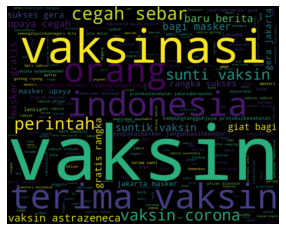

Negatif


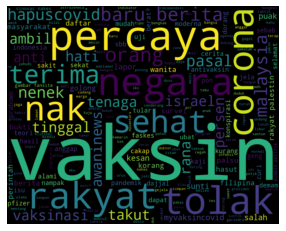

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

print('Positif')
allWords  = ' '.join( [twts for twts in pos['text_join']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

print('Negatif')
allWords  = ' '.join( [twts for twts in neg['text_join']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [32]:
terms = tf_idf.get_feature_names()

#sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

#connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print_rank = ranking.sort_values('rank', ascending=True)
print_rank.to_csv('8_data_hasil_tfidf.csv')
print_rank.head(20)
nilai_idf_perkata = pd.DataFrame(data)
nilai_idf_perkata.sort_values(1, ascending=True)

,0,1
161,awak,0.210538
1544,niat,0.210538
64,alhamdulilah,0.210538
2446,urip,0.210538
1464,moro,0.210538
...,...,...
411,corona,16.463274
375,cegah,17.396696
2458,vaksinasi,17.621630
2329,terima,23.641359


In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from nltk.classify import NaiveBayesClassifier
clf3 = BernoulliNB()
clf4 = MultinomialNB()
from sklearn.model_selection import train_test_split
X=data_hasil_cleansing.text_join
y=data_hasil_cleansing.sentimen

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 760
Banyak data x_test  : 190
Banyak data y_train : 760
Banyak data y_test  : 190


In [35]:
y_train.value_counts()

p    660
n    100
Name: sentimen, dtype: int64

In [36]:
y_test.value_counts()

p    165
n     25
Name: sentimen, dtype: int64

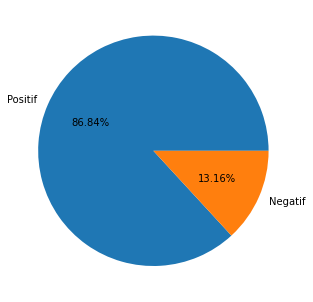

In [37]:
# data uji
data_siap = y_test.value_counts()
##data_siap.to_csv('data_siap.csv', index=False)
# data_siap['sentimen'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis()
sentimen = ['Positif', 'Negatif']
Nilai = data_siap
ax.pie(Nilai,labels=sentimen,autopct='%1.2f%%')
plt.show()

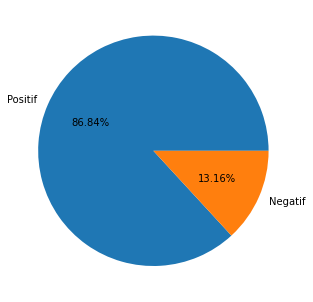

In [38]:
# data latih
data_siap = y_train.value_counts()
##data_siap.to_csv('data_siap.csv', index=False)
# data_siap['sentimen'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis()
sentimen = ['Positif', 'Negatif']
Nilai = data_siap
ax.pie(Nilai,labels=sentimen,autopct='%1.2f%%')
plt.show()

In [39]:
y_test.value_counts()

p    165
n     25
Name: sentimen, dtype: int64

In [40]:
from sklearn.pipeline import Pipeline
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])
model3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', BernoulliNB())])

In [42]:
hasil3=model3.predict(x_test)
pd.DataFrame(hasil3).value_counts()

p    190
dtype: int64

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

### K2 

In [35]:
from sklearn.model_selection import cross_val_score


hasil = cross_val_score(model3, x_train, y_train, cv = 2, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasil),4)*100)
print('Rata-rata akurasi :', round(hasil.mean()*100,4))
from sklearn import metrics
scores = cross_val_score(
    model3, x_train, y_train, cv=2, scoring='precision_macro')
recalls = cross_val_score(
    model3, x_train, y_train, cv=2, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scores), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scores.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recalls), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recalls.mean()*100,4))

Akurasi Naive Bayes:         0
0  80.27
1  80.04
Rata-rata akurasi : 80.1562
Presisi Naive Bayes:         0
0  79.78
1  79.54
Rata-rata Presisi Naive Bayes:  79.658
Recall Naive Bayes:         0
0  80.14
1  79.85
Rata-rata Recall Naive Bayes:  79.9995


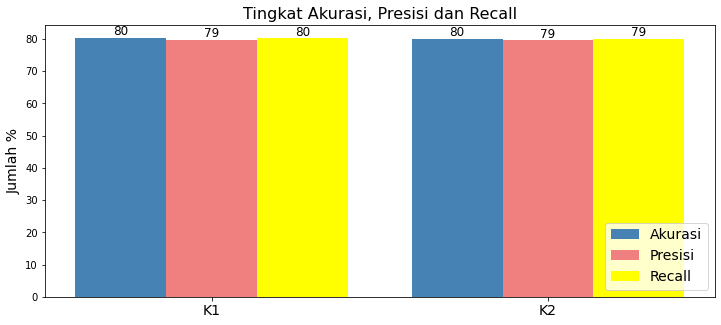

In [36]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfold = ['K1', 'K2']
akurasi = hasil*100
presisi = scores*100
recallku = recalls*100


x = np.arange(len(kfold))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasi = ax.bar(x, akurasi, width, label='Akurasi', color='steelblue')
presisi = ax.bar(x + width, presisi, width, label='Presisi', color='lightcoral')
recall = ax.bar(x + width*2, recallku, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfold, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasi)
autolabel(presisi)
autolabel(recall)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K3 

In [37]:
from sklearn.model_selection import cross_val_score


hasil33 = cross_val_score(model3, x_train, y_train, cv = 3, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasil33),4)*100)
print('Rata-rata akurasi :', round(hasil33.mean()*100,4))
from sklearn import metrics
scores3 = cross_val_score(
    model3, x_train, y_train, cv=3, scoring='precision_macro')
recalls3 = cross_val_score(
    model3, x_train, y_train, cv=3, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scores3), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scores3.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recalls3), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recalls3.mean()*100,4))

Akurasi Naive Bayes:         0
0  80.25
1  79.31
2  80.88
Rata-rata akurasi : 80.1458
Presisi Naive Bayes:         0
0  79.76
1  78.82
2  80.42
Rata-rata Presisi Naive Bayes:  79.6666
Recall Naive Bayes:         0
0  80.16
1  79.21
2  80.91
Rata-rata Recall Naive Bayes:  80.0931


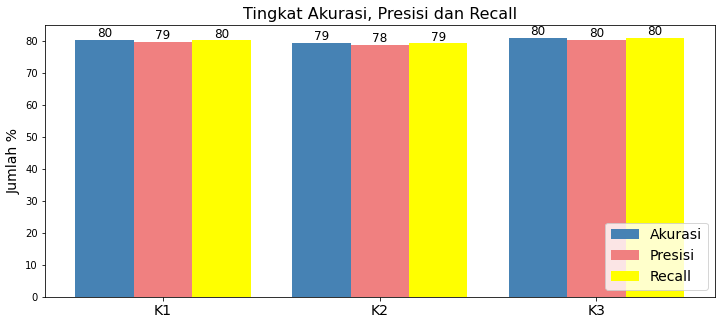

In [38]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfold3 = ['K1', 'K2', 'K3']
akurasi3 = hasil33*100
presisi3 = scores3*100
recallku3 = recalls3*100


x = np.arange(len(kfold3))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasi3 = ax.bar(x, akurasi3, width, label='Akurasi', color='steelblue')
presisi3 = ax.bar(x + width, presisi3, width, label='Presisi', color='lightcoral')
recall3 = ax.bar(x + width*2, recallku3, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfold3, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasi3)
autolabel(presisi3)
autolabel(recall3)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K4 

In [39]:
from sklearn.model_selection import cross_val_score


hasil4 = cross_val_score(model3, x_train, y_train, cv = 4, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasil4),4)*100)
print('Rata-rata akurasi :', round(hasil4.mean()*100,4))
from sklearn import metrics
scores4 = cross_val_score(
    model3, x_train, y_train, cv=4, scoring='precision_macro')
recalls4 = cross_val_score(
    model3, x_train, y_train, cv=4, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scores4), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scores4.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recalls4), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recalls4.mean()*100,4))

Akurasi Naive Bayes:         0
0  80.29
1  79.79
2  79.54
3  80.83
Rata-rata akurasi : 80.1146
Presisi Naive Bayes:         0
0  79.79
1  79.36
2  79.10
3  80.36
Rata-rata Presisi Naive Bayes:  79.6512
Recall Naive Bayes:         0
0  80.11
1  79.88
2  79.61
3  80.79
Rata-rata Recall Naive Bayes:  80.099


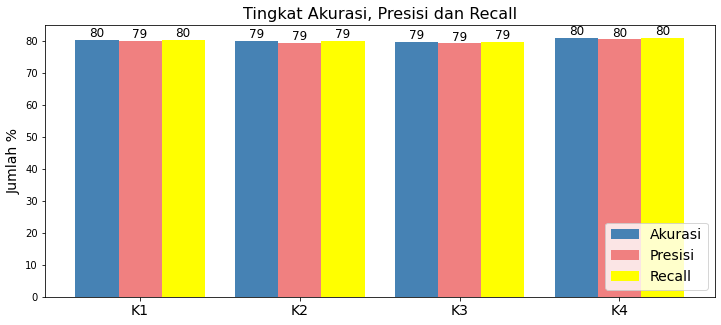

In [40]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfold4 = ['K1', 'K2','K3','K4']
akurasi4 = hasil4*100
presisi4 = scores4*100
recallku4 = recalls4*100


x = np.arange(len(kfold4))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasi4 = ax.bar(x, akurasi4, width, label='Akurasi', color='steelblue')
presisi4 = ax.bar(x + width, presisi4, width, label='Presisi', color='lightcoral')
recall4 = ax.bar(x + width*2, recallku4, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfold4, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasi4)
autolabel(presisi4)
autolabel(recall4)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K5 

In [41]:
from sklearn.model_selection import cross_val_score


hasil5 = cross_val_score(model3, x_train, y_train, cv = 5, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasil5),4)*100)
print('Rata-rata akurasi :', round(hasil5.mean()*100,4))
from sklearn import metrics
scores5 = cross_val_score(
    model3, x_train, y_train, cv=5, scoring='precision_macro')
recalls5 = cross_val_score(
    model3, x_train, y_train, cv=5, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scores5), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scores5.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recalls5), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recalls5.mean()*100,4))

Akurasi Naive Bayes:         0
0  80.68
1  79.48
2  80.36
3  79.11
4  80.78
Rata-rata akurasi : 80.0833
Presisi Naive Bayes:         0
0  80.18
1  79.10
2  79.89
3  78.72
4  80.30
Rata-rata Presisi Naive Bayes:  79.6385
Recall Naive Bayes:         0
0  80.47
1  79.68
2  80.32
3  79.30
4  80.73
Rata-rata Recall Naive Bayes:  80.102


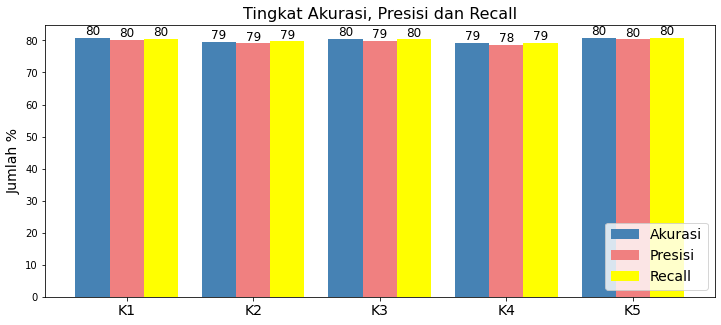

In [42]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfold5 = ['K1', 'K2','K3','K4','K5']
akurasi5 = hasil5*100
presisi5 = scores5*100
recallku5 = recalls5*100


x = np.arange(len(kfold5))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasi5 = ax.bar(x, akurasi5, width, label='Akurasi', color='steelblue')
presisi5 = ax.bar(x + width, presisi5, width, label='Presisi', color='lightcoral')
recall5 = ax.bar(x + width*2, recallku5, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfold5, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasi5)
autolabel(presisi5)
autolabel(recall5)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K6

In [43]:
from sklearn.model_selection import cross_val_score


hasil6 = cross_val_score(model3, x_train, y_train, cv = 6, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasil6),4)*100)
print('Rata-rata akurasi :', round(hasil6.mean()*100,4))
from sklearn import metrics
scores6 = cross_val_score(
    model3, x_train, y_train, cv=6, scoring='precision_macro')
recalls6 = cross_val_score(
    model3, x_train, y_train, cv=6, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scores6), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scores6.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recalls6), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recalls6.mean()*100,4))

Akurasi Naive Bayes:         0
0  80.62
1  80.75
2  79.19
3  79.50
4  81.12
5  80.25
Rata-rata akurasi : 80.2396
Presisi Naive Bayes:         0
0  80.12
1  80.33
2  78.71
3  79.02
4  80.70
5  79.78
Rata-rata Presisi Naive Bayes:  79.7771
Recall Naive Bayes:         0
0  80.38
1  80.89
2  79.16
3  79.43
4  81.26
5  80.24
Rata-rata Recall Naive Bayes:  80.227


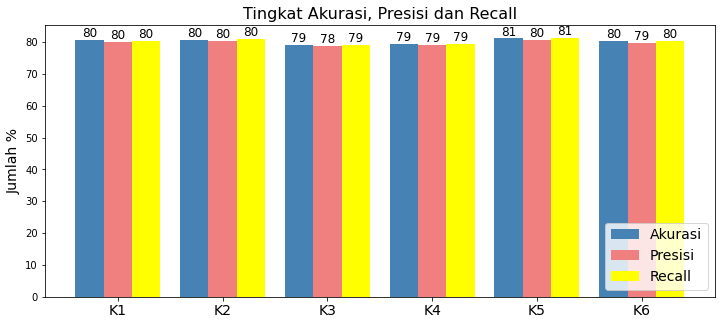

In [44]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfold6 = ['K1', 'K2','K3','K4','K5','K6']
akurasi6 = hasil6*100
presisi6 = scores6*100
recallku6 = recalls6*100


x = np.arange(len(kfold6))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasi6 = ax.bar(x, akurasi6, width, label='Akurasi', color='steelblue')
presisi6 = ax.bar(x + width, presisi6, width, label='Presisi', color='lightcoral')
recall6 = ax.bar(x + width*2, recallku6, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfold6, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasi6)
autolabel(presisi6)
autolabel(recall6)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K8 

In [45]:
from sklearn.model_selection import cross_val_score


hasil8 = cross_val_score(model3, x_train, y_train, cv = 8, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasil8),4)*100)
print('Rata-rata akurasi :', round(hasil8.mean()*100,4))
from sklearn import metrics
scores8 = cross_val_score(
    model3, x_train, y_train, cv=8, scoring='precision_macro')
recalls8 = cross_val_score(
    model3, x_train, y_train, cv=8, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scores8), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scores8.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recalls8), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recalls8.mean()*100,4))

Akurasi Naive Bayes:         0
0  80.92
1  80.75
2  79.25
3  79.67
4  80.67
5  78.83
6  81.25
7  79.58
Rata-rata akurasi : 80.1146
Presisi Naive Bayes:         0
0  80.41
1  80.30
2  78.92
3  79.17
4  80.22
5  78.46
6  80.76
7  79.15
Rata-rata Presisi Naive Bayes:  79.6751
Recall Naive Bayes:         0
0  80.61
1  80.79
2  79.55
3  79.56
4  80.72
5  79.05
6  81.09
7  79.68
Rata-rata Recall Naive Bayes:  80.1319


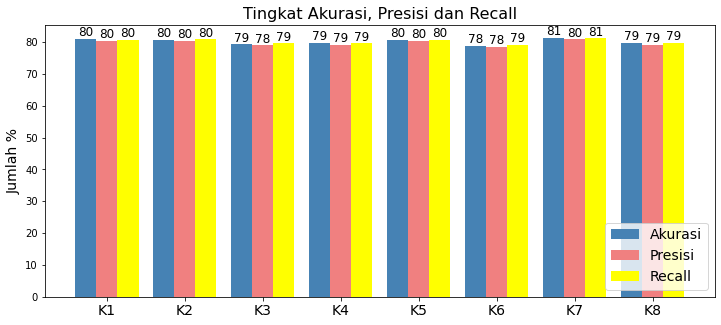

In [46]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfold8 = ['K1', 'K2','K3','K4','K5','K6','K7','K8']
akurasi8 = hasil8*100
presisi8 = scores8*100
recallku8 = recalls8*100


x = np.arange(len(kfold8))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasi8 = ax.bar(x, akurasi8, width, label='Akurasi', color='steelblue')
presisi8 = ax.bar(x + width, presisi8, width, label='Presisi', color='lightcoral')
recall8 = ax.bar(x + width*2, recallku8, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfold8, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasi8)
autolabel(presisi8)
autolabel(recall8)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K10 

In [47]:
from sklearn.model_selection import cross_val_score


hasil10 = cross_val_score(model3, x_train, y_train, cv = 10, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasil10),4)*100)
print('Rata-rata akurasi :', round(hasil10.mean()*100,4))
from sklearn import metrics
scores10 = cross_val_score(
    model3, x_train, y_train, cv=10, scoring='precision_macro')
recalls10 = cross_val_score(
    model3, x_train, y_train, cv=10, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scores10), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scores10.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recalls10), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recalls10.mean()*100,4))

Akurasi Naive Bayes:         0
0  81.15
1  80.73
2  80.42
3  78.75
4  79.58
5  80.94
6  77.60
7  81.98
8  81.25
9  79.79
Rata-rata akurasi : 80.2188
Presisi Naive Bayes:         0
0  80.65
1  80.23
2  80.13
3  78.24
4  79.08
5  80.49
6  77.14
7  81.65
8  80.79
9  79.32
Rata-rata Presisi Naive Bayes:  79.7725
Recall Naive Bayes:         0
0  80.96
1  80.60
2  80.83
3  78.62
4  79.47
5  80.98
6  77.60
7  82.31
8  81.22
9  79.76
Rata-rata Recall Naive Bayes:  80.2354


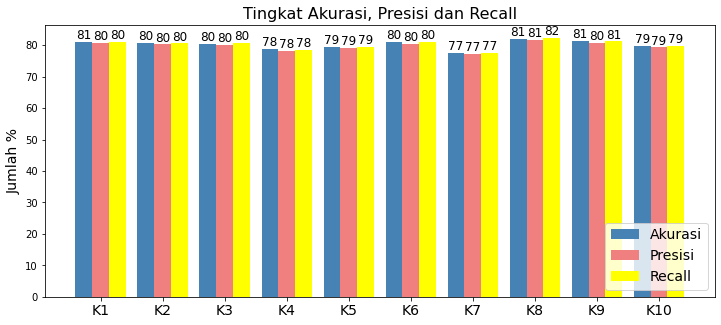

In [48]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfold10 = ['K1', 'K2','K3','K4','K5','K6','K7','K8','K9','K10']
akurasi10 = hasil10*100
presisi10 = scores10*100
recallku10 = recalls10*100


x = np.arange(len(kfold10))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasi10 = ax.bar(x, akurasi10, width, label='Akurasi', color='steelblue')
presisi10 = ax.bar(x + width, presisi10, width, label='Presisi', color='lightcoral')
recall10 = ax.bar(x + width*2, recallku10, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfold10, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasi10)
autolabel(presisi10)
autolabel(recall10)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

In [49]:
gabung = {
        'x_test' : x_test,
        'y_test' : y_test,
        'kalsifikasi' : hasil3
}
hasil_gabung = pd.DataFrame(gabung)
hasil_gabung.to_csv('hasil_klasifikasi_no_smote.csv')

In [42]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; error={:0.4f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()
    

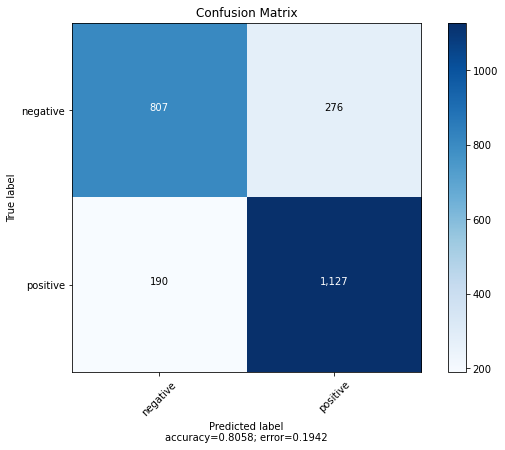

In [43]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = [ 'negative','positive'],
                      title        = "Confusion Matrix")

In [45]:
from sklearn.metrics import classification_report,confusion_matrix, precision_score
matrix = classification_report(y_test,hasil3)
print('jumlah data : ', y_train.shape)

print('pembagian data :\n' ,y_train.value_counts())

jumlah data :  (760,)
pembagian data :
 p    660
n    100
Name: sentimen, dtype: int64


C:\Users\IDONDIDONG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IDONDIDONG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IDONDIDONG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
cm = confusion_matrix(y_test, hasil3)
TN = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TP = cm[1][1]

print('True Positive : ', TP)
print('False Positive : ', FP)
print('True Negative : ', TN)
print('False Negative : ', FN)
print('-----------------------')
print('Akurasi : ', round((TP+TN)/(TP+TN+FP+FN), 4)*100)
print('Presisi : ', round((TP)/(TP+FP), 4)*100)
print('Recall : ', round(TP/(TP+FN), 5)*100)

True Positive :  1127
False Positive :  276
True Negative :  807
False Negative :  190
-----------------------
Akurasi :  80.58
Presisi :  80.33
Recall :  85.573


In [46]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(Data_hasil_teks_preprocessing['text_join'].values)
X = tokenizer.texts_to_sequences(Data_hasil_teks_preprocessing['text_join'].values)
word_index = tokenizer.word_index


kolom_text = pad_sequences(X)
print(kolom_text.shape)
print(kolom_text)
# data['category'].shape

(950, 31)
[[   0    0    0 ...   35  234   39]
 [   0    0    0 ...  783  140    8]
 [   0    0    0 ...   35  234  198]
 ...
 [   0    0    0 ... 1166   11   19]
 [   0    0    0 ...    1   18    9]
 [   0    0    0 ...   12    1  555]]


In [47]:
print("Number transactions X_train dataset: ", x_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", x_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (9600,)
Number transactions y_train dataset:  (9600,)
Number transactions X_test dataset:  (2400,)
Number transactions y_test dataset:  (2400,)


In [48]:
y_train.value_counts()

p    5545
n    4055
Name: sentimen, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
text = data_hasil_cleansing['text_join']
outputnya = data_hasil_cleansing['sentimen']

In [50]:
tv = TfidfVectorizer()
testing_tfidf = tv.fit_transform(text)
testing_tfidf

<12000x13855 sparse matrix of type '<class 'numpy.float64'>'
	with 107952 stored elements in Compressed Sparse Row format>

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(testing_tfidf,outputnya,test_size=0.2, random_state=0)

In [52]:
print('Banyak data x_train :',(X_train.shape))
print('Banyak data x_test  :',(X_test.shape))
print('Banyak data y_train :',(Y_train.shape))
print('Banyak data y_test  :',(Y_test.shape))

Banyak data x_train : (9600, 13855)
Banyak data x_test  : (2400, 13855)
Banyak data y_train : (9600,)
Banyak data y_test  : (2400,)


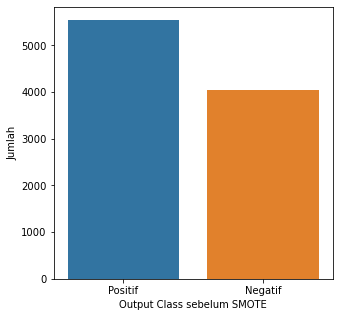

In [53]:
ouput1 = ['Positif','Negatif']
plt.figure(figsize=(5,5))
sns.barplot(x=ouput1, y=pd.Series(Y_train).value_counts())
plt.xlabel('Output Class sebelum SMOTE')
plt.ylabel('Jumlah')
plt.show()

In [54]:
ros = SMOTE()
X_ROS, y_ROS = ros.fit_resample(X_train, Y_train)
pd.DataFrame(X_train.todense(), columns=tv.get_feature_names())

,aaa,aaaaa,aaaaaaaaaa,aaah,aaamiiin,aagirum,aagym,aah,aai,aamal,...,zona,zone,zoo,zoom,zor,zubir,zuha,zul,zuwa,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


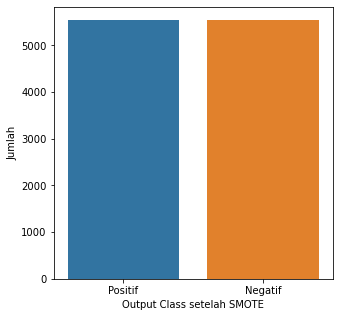

In [55]:
ouput1 = ['Positif','Negatif']
plt.figure(figsize=(5,5))
sns.barplot(x=ouput1, y=pd.Series(y_ROS).value_counts())
plt.xlabel('Output Class setelah SMOTE')
plt.ylabel('Jumlah')
plt.show()

In [56]:
X_ROS.shape

(11090, 13855)

In [57]:
y_ROS.shape

(11090,)

In [58]:
y_ROS.value_counts()

p    5545
n    5545
Name: sentimen, dtype: int64

In [59]:
from sklearn.pipeline import Pipeline
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])
klasifikasi_smote = clf3.fit(X_ROS,y_ROS)

### K2 SMOTE 

In [76]:
from sklearn.model_selection import cross_val_score


hasilsmote2 = cross_val_score(klasifikasi_smote, X_ROS, y_ROS, cv = 2, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasilsmote2),4)*100)
print('Rata-rata akurasi :', round(hasilsmote2.mean()*100,4))
from sklearn import metrics
scoressmote2 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=2, scoring='precision_macro')
recallssmote2 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=2, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scoressmote2), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scoressmote2.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recallssmote2), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recallssmote2.mean()*100,4))

Akurasi Naive Bayes:         0
0  81.61
1  81.35
Rata-rata akurasi : 81.4788
Presisi Naive Bayes:         0
0  81.64
1  81.77
Rata-rata Presisi Naive Bayes:  81.7061
Recall Naive Bayes:         0
0  81.61
1  81.35
Rata-rata Recall Naive Bayes:  81.4784


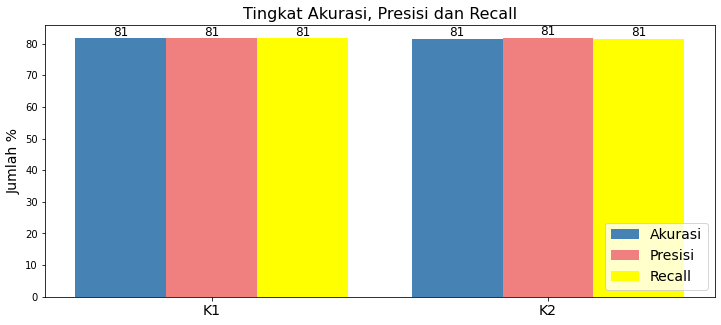

In [77]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfoldsmote2 = ['K1', 'K2']
akurasismote2 = hasilsmote2*100
presisismote2 = scoressmote2*100
recallkusmote2 = recallssmote2*100


x = np.arange(len(kfoldsmote2))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasismote2 = ax.bar(x, akurasismote2, width, label='Akurasi', color='steelblue')
presisismote2 = ax.bar(x + width, presisismote2, width, label='Presisi', color='lightcoral')
recallsmote2 = ax.bar(x + width*2, recallkusmote2, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfoldsmote2, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasismote2)
autolabel(presisismote2)
autolabel(recallsmote2)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K4 SMOTE 

In [78]:
from sklearn.model_selection import cross_val_score


hasilsmote4 = cross_val_score(klasifikasi_smote, X_ROS, y_ROS, cv = 4, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasilsmote4),4)*100)
print('Rata-rata akurasi :', round(hasilsmote4.mean()*100,4))
from sklearn import metrics
scoressmote4 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=4, scoring='precision_macro')
recallssmote4 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=4, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scoressmote4), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scoressmote4.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recallssmote4), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recallssmote4.mean()*100,4))

Akurasi Naive Bayes:         0
0  81.82
1  80.89
2  81.46
3  82.40
Rata-rata akurasi : 81.6412
Presisi Naive Bayes:         0
0  81.90
1  81.02
2  81.65
3  82.91
Rata-rata Presisi Naive Bayes:  81.8708
Recall Naive Bayes:         0
0  81.83
1  80.89
2  81.46
3  82.40
Rata-rata Recall Naive Bayes:  81.6411


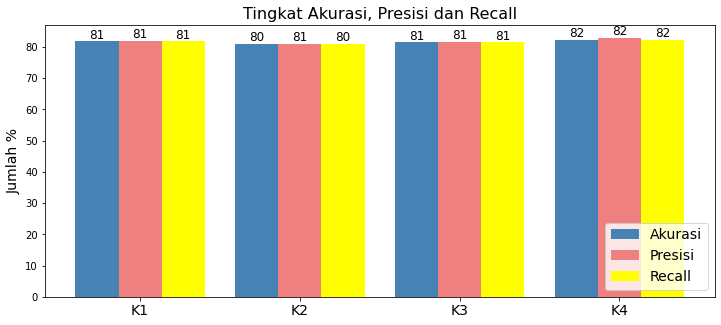

In [79]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfoldsmote4 = ['K1', 'K2','K3','K4']
akurasismote4 = hasilsmote4*100
presisismote4 = scoressmote4*100
recallkusmote4 = recallssmote4*100


x = np.arange(len(kfoldsmote4))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasismote4 = ax.bar(x, akurasismote4, width, label='Akurasi', color='steelblue')
presisismote4 = ax.bar(x + width, presisismote4, width, label='Presisi', color='lightcoral')
recallsmote4 = ax.bar(x + width*2, recallkusmote4, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfoldsmote4, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasismote4)
autolabel(presisismote4)
autolabel(recallsmote4)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K5 SMOTE

In [80]:
from sklearn.model_selection import cross_val_score


hasilsmote5 = cross_val_score(klasifikasi_smote, X_ROS, y_ROS, cv = 5, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasilsmote5),4)*100)
print('Rata-rata akurasi :', round(hasilsmote5.mean()*100,4))
from sklearn import metrics
scoressmote5 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=5, scoring='precision_macro')
recallssmote5 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=5, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scoressmote5), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scoressmote5.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recallssmote5), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recallssmote5.mean()*100,4))

Akurasi Naive Bayes:         0
0  82.24
1  80.97
2  81.06
3  81.47
4  82.55
Rata-rata akurasi : 81.6592
Presisi Naive Bayes:         0
0  82.34
1  81.24
2  81.15
3  81.87
4  83.00
Rata-rata Presisi Naive Bayes:  81.9195
Recall Naive Bayes:         0
0  82.24
1  80.97
2  81.06
3  81.47
4  82.55
Rata-rata Recall Naive Bayes:  81.6592


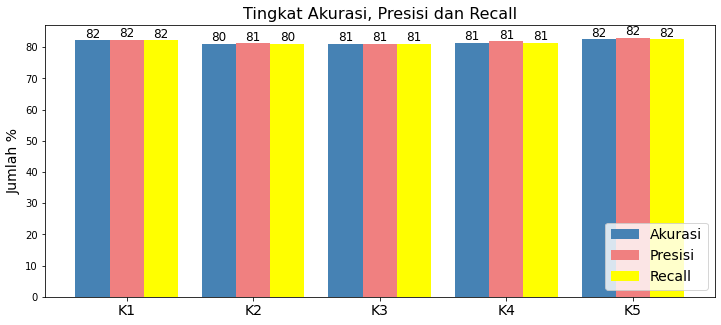

In [81]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfoldsmote5 = ['K1', 'K2','K3','K4','K5']
akurasismote5 = hasilsmote5*100
presisismote5 = scoressmote5*100
recallkusmote5 = recallssmote5*100


x = np.arange(len(kfoldsmote5))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasismote5 = ax.bar(x, akurasismote5, width, label='Akurasi', color='steelblue')
presisismote5 = ax.bar(x + width, presisismote5, width, label='Presisi', color='lightcoral')
recallsmote5 = ax.bar(x + width*2, recallkusmote5, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfoldsmote5, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasismote5)
autolabel(presisismote5)
autolabel(recallsmote5)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K8 SMOTE 

In [82]:
from sklearn.model_selection import cross_val_score


hasilsmote8 = cross_val_score(klasifikasi_smote, X_ROS, y_ROS, cv = 8, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasilsmote8),4)*100)
print('Rata-rata akurasi :', round(hasilsmote8.mean()*100,4))
from sklearn import metrics
scoressmote8 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=8, scoring='precision_macro')
recallssmote8 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=8, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scoressmote8), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scoressmote8.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recallssmote8), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recallssmote8.mean()*100,4))

Akurasi Naive Bayes:         0
0  82.05
1  82.12
2  80.81
3  80.45
4  82.25
5  79.87
6  84.13
7  82.83
Rata-rata akurasi : 81.8124
Presisi Naive Bayes:         0
0  82.09
1  82.30
2  81.09
3  80.59
4  82.43
5  80.19
6  84.50
7  83.50
Rata-rata Presisi Naive Bayes:  82.0859
Recall Naive Bayes:         0
0  82.05
1  82.12
2  80.81
3  80.45
4  82.25
5  79.87
6  84.13
7  82.83
Rata-rata Recall Naive Bayes:  81.8122


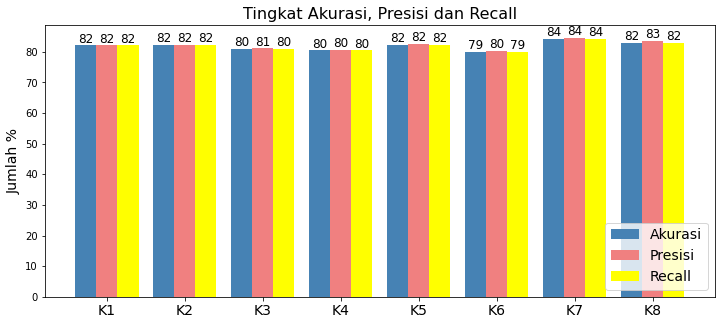

In [83]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfoldsmote8 = ['K1', 'K2','K3','K4','K5','K6','K7','K8']
akurasismote8 = hasilsmote8*100
presisismote8 = scoressmote8*100
recallkusmote8 = recallssmote8*100


x = np.arange(len(kfoldsmote8))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasismote8 = ax.bar(x, akurasismote8, width, label='Akurasi', color='steelblue')
presisismote8 = ax.bar(x + width, presisismote8, width, label='Presisi', color='lightcoral')
recallsmote8 = ax.bar(x + width*2, recallkusmote8, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfoldsmote8, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasismote8)
autolabel(presisismote8)
autolabel(recallsmote8)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### K10 SMOTE 

In [84]:
from sklearn.model_selection import cross_val_score


hasilsmote10 = cross_val_score(klasifikasi_smote, X_ROS, y_ROS, cv = 10, n_jobs = -1)
print('Akurasi Naive Bayes: ', round(pd.DataFrame(hasilsmote10),4)*100)
print('Rata-rata akurasi :', round(hasilsmote10.mean()*100,4))
from sklearn import metrics
scoressmote10 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=10, scoring='precision_macro')
recallssmote10 = cross_val_score(
    klasifikasi_smote, X_ROS, y_ROS, cv=10, scoring='recall_macro')


print('Presisi Naive Bayes: ',round(pd.DataFrame(scoressmote10), 4)*100)
print('Rata-rata Presisi Naive Bayes: ',round(scoressmote10.mean()*100,4))
print('Recall Naive Bayes: ',round(pd.DataFrame(recallssmote10), 4)*100)
print('Rata-rata Recall Naive Bayes: ',round(recallssmote10.mean()*100,4))

Akurasi Naive Bayes:         0
0  81.42
1  83.23
2  80.52
3  80.88
4  80.70
5  82.51
6  80.25
7  82.15
8  83.41
9  83.23
Rata-rata akurasi : 81.8305
Presisi Naive Bayes:         0
0  81.45
1  83.50
2  80.84
3  81.14
4  80.78
5  82.70
6  80.58
7  82.64
8  83.78
9  83.74
Rata-rata Presisi Naive Bayes:  82.1131
Recall Naive Bayes:         0
0  81.43
1  83.23
2  80.53
3  80.89
4  80.71
5  82.50
6  80.25
7  82.14
8  83.40
9  83.22
Rata-rata Recall Naive Bayes:  81.8297


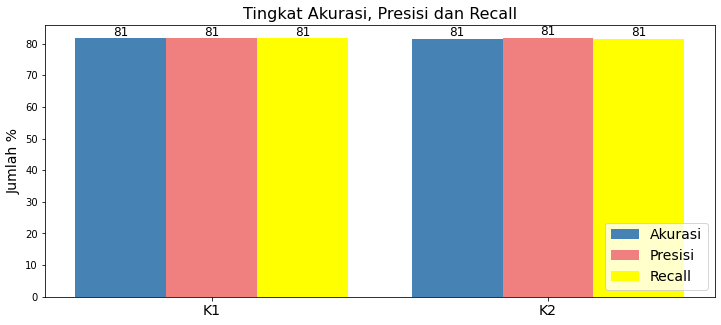

In [85]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

kfoldsmote2 = ['K1', 'K2']
akurasismote2 = hasilsmote2*100
presisismote2 = scoressmote2*100
recallkusmote2 = recallssmote2*100


x = np.arange(len(kfoldsmote2))
width = 0.27

fig, ax = plt.subplots(figsize=(12, 5))

akurasismote2 = ax.bar(x, akurasismote2, width, label='Akurasi', color='steelblue')
presisismote2 = ax.bar(x + width, presisismote2, width, label='Presisi', color='lightcoral')
recallsmote2 = ax.bar(x + width*2, recallkusmote2, width, label='Recall', color='Yellow')

# i = 0.1
# j = 100
# for i in range(len(prodi)):
#     plt.annotate(mahasiswa[i], (-0.1 + i, mahasiswa[i] + j))
ax.set_title('Tingkat Akurasi, Presisi dan Recall', size=16)
ax.set_ylabel('Jumlah %', size=14)
ax.set_xticks(x+width)
ax.set_xticklabels(kfoldsmote2, size=14)

# plt.legend(labels = ['Akurasi', 'Presisi'])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(akurasismote2)
autolabel(presisismote2)
autolabel(recallsmote2)

# ax.legend(fontsize=12)
plt.legend(loc=4, fontsize=14)

plt.show()

### VALIDASI 

In [60]:
hasilsmote=klasifikasi_smote.predict(X_test)

In [61]:
cm2 = confusion_matrix(Y_test, hasilsmote)
TN = cm2[0][0]
FN = cm2[0][1]
FP = cm2[1][0]
TP = cm2[1][1]

print('True Positive : ', TP)
print('False Positive : ', FP)
print('True Negative : ', TN)
print('False Negative : ', FN)
print('-----------------------')
print('Akurasi : ', round((TP+TN)/(TP+TN+FP+FN), 5)*100)
print('Presisi : ', round((TP)/(TP+FP), 5)*100)
print('Recall : ', round(TP/(TP+FN), 4)*100)

True Positive :  1095
False Positive :  308
True Negative :  831
False Negative :  166
-----------------------
Akurasi :  80.25
Presisi :  78.047
Recall :  86.83999999999999


In [63]:
Y_test.value_counts()

p    1403
n     997
Name: sentimen, dtype: int64

In [65]:
pd.DataFrame(hasilsmote).value_counts()

p    1261
n    1139
dtype: int64

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; error={:0.4f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()
    

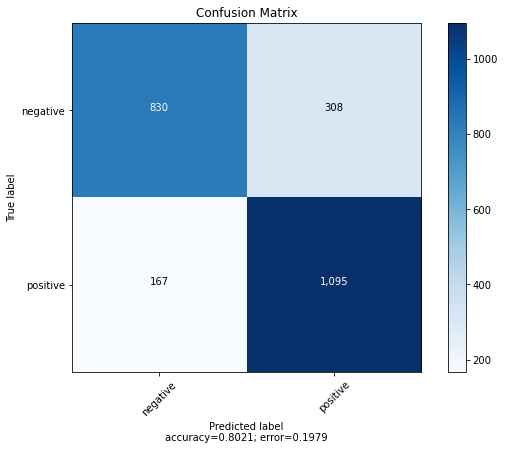

In [89]:
plot_confusion_matrix(cm           = confusion_matrix(hasilsmote,y_test), 
                      normalize    = False,
                      target_names = [ 'negative','positive'],
                      title        = "Confusion Matrix")